# ***Cardiovascular Risk factors***

## **Introduction**
Cardiovascular diseases (CVDs) are a group of disorders that affect the heart and blood vessels, and they represent the leading cause of death worldwide. To effectively prevent and manage these conditions, it is essential to understand the risk factors that contribute to their development.

Cardiovascular risk factors are traits or conditions that increase the likelihood of developing heart-related illnesses. These risk factors are typically divided into two categories: modifiable and non-modifiable.

**Modifiable risk factors** are those that can be influenced through changes in behavior or lifestyle. Examples include high blood pressure, high cholesterol, diabetes, smoking, obesity, physical inactivity, poor dietary habits, and excessive alcohol consumption. Because these factors are controllable, they offer significant opportunities for prevention and intervention.

On the other hand, **non-modifiable risk factors** are those that cannot be changed. These include age, gender, family history of cardiovascular disease, and ethnicity. While these factors are beyond an individual's control, they are important for identifying those who may be at greater risk and guiding screening and monitoring efforts.

Analyzing cardiovascular risk factors is important for several reasons. It helps identify individuals who are at high risk and may benefit from early interventions. It also supports the development of targeted public health programs, informs clinical decision-making,


## *Problem Statement*

Cardiovascular diseases (CVDs) remain the leading cause of death globally, making early detection and risk factor analysis a critical area of focus for both public health and clinical decision-making. Despite the availability of medical check-up data, timely diagnosis is still a challenge due to the multifactorial nature of heart disease.

This project aims to leverage machine learning and data analysis techniques to identify and quantify key risk factors associated with cardiovascular disease. Using patient health metrics—such as blood pressure, cholesterol levels, BMI, and lifestyle attributes—we seek to build predictive models that can classify individuals as at risk or not at risk for cardiovascular events.

The goal is to provide a data-driven tool that can assist healthcare professionals in identifying high-risk individuals early, enabling more targeted prevention strategies and better resource allocation.


## *Objectives*

The main objectives of this project are as follows:

- To perform **exploratory data analysis (EDA)** on variables that are potentially associated with cardiovascular disease.
- To develop a **baseline model** for initial performance benchmarking.
- To build a **machine learning model** capable of predicting an individual's risk of developing cardiovascular disease.
- To **evaluate the performance** of the model using appropriate metrics and perform **hyperparameter tuning** to optimize results, if necessary.


## **Dataset**

The dataset used for this analysis is sourced from Kaggle and contains health-related records for 70,000 individuals. Each record includes various features that may contribute to the risk of developing cardiovascular disease.

The target variable is **cardiovascular disease**, which indicates whether an individual has been diagnosed with the condition (`1`) or not (`0`).

The dataset is relatively clean, with minimal inconsistencies, making it suitable for analysis without extensive preprocessing. However, some feature engineering will be necessary to extract more meaningful insights and better align the data with our analysis objectives.

Key tasks will include transforming and deriving new features from existing columns to improve model performance and enhance interpretability.


## **Data Preprocessing**

## *Importing The Necessary Libraries*

In [1]:
#importing the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor



## *Loading The Dataset*

We begin by loading the cardiovascular dataset using `pandas`. The data is separated by semicolons.


In [2]:
# loading the dataset
df=pd.read_csv("cardio_train.csv",sep=";")
df



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


To preserve the original dataset, we create a copy named `df_new`, which we will use for all transformations and analysis.


In [3]:
df_new=df.copy()

### Dataset Structure

After resolving the formatting issue and transforming the dataset into its correct structure, we now have a clean DataFrame with meaningful columns, ready for analysis.

The main columns in the dataset are as follows:

- **age**: Age of the individual (in days)
- **gender**: Gender (1 = female, 2 = male)
- **height**: Height of the individual (in cm)
- **weight**: Weight of the individual (in kg)
- **ap_hi**: Systolic blood pressure
- **ap_lo**: Diastolic blood pressure
- **cholesterol**: Cholesterol level (1 = normal, 2 = above normal, 3 = well above normal)
- **gluc**: Glucose level (1 = normal, 2 = above normal, 3 = well above normal)
- **smoke**: Smoking status (1 = smoker, 0 = non-smoker)
- **alco**: Alcohol consumption (1 = consumes alcohol, 0 = does not)
- **active**: Physical activity (1 = active, 0 = not active)
- **cardio**: Presence of cardiovascular disease (1 = has condition, 0 = does not)

This structure allows us to perform exploratory data analysis (EDA), feature engineering, and model development effectively.


## *Summary of the dataset*

Before diving into analysis, it's important to examine the overall structure of the dataset. This step helps us verify that the data has been loaded correctly, understand the types of each feature, and identify any potential issues such as missing values or incorrect data types.



In [4]:
# viewing summary of the dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


The dataset consists of 70,000 records with 13 columns in total. An initial inspection confirms that there are no missing values, which simplifies the preprocessing steps.

However, all the columns have been loaded as object types, meaning that the data is currently stored as strings. This indicates that we need to convert several columns to their correct numerical data types—such as integers or floats—before performing any meaningful analysis or modeling. Proper type casting is essential to ensure accurate computations and to apply appropriate machine learning algorithms.


## *Casting Columns*

In this step, we convert the columns to their appropriate data types. Properly casting the data ensures that numerical operations, statistical analyses, and machine learning algorithms can be applied correctly and efficiently.




In [5]:
# casting the numerical columns into integers
df_new[["id","age","height","weight","ap_hi","ap_lo"]]=df_new[["id","age","height","weight","ap_hi","ap_lo"]].astype(int)

In [6]:
# checking for the new data types
df_new.dtypes

id             int32
age            int32
gender         int64
height         int32
weight         int32
ap_hi          int32
ap_lo          int32
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

After casting the columns to their appropriate data types, we confirm that each column now reflects the correct type.


## Checking for Duplicates

It is important to check for duplicate records in the dataset, as duplicates can compromise data integrity. Duplicate entries may bias the analysis, lead to overfitting in models, and give misleading insights.



In [7]:
# checking for duplicates
df_new.duplicated().sum()

0

We see that the dataset had no duplicates.

## *Transforming the Columns*

In this step, we will transform certain columns into more meaningful or preferred units. This is essential for improving the interpretability of the data, facilitating effective feature engineering, and ensuring consistency during analysis.



We will start by transforming the age column from age in days to age in years for better interpretability. We will cast the new column into an integer

In [8]:
# coverting age from days to years
df_new["age"]=df_new["age"]/365
# casting the age column into an integer
df_new["age"]=df_new["age"].astype(int)


Also we will need to transform the height column from height in centimeters to height in meters to help us when engineering the BMI column.

In [9]:
# changing height to be in metres
df_new["height"]=df_new["height"]/100
df_new["height"].sample(5)

1792     1.61
51241    1.70
50165    1.58
36931    1.68
27360    1.58
Name: height, dtype: float64

## *Feature Engineering*

In this step, we will generate additional features derived from the existing variables in our dataset. These engineered features are intended to capture more meaningful patterns and relationships that may not be immediately apparent from the raw data.



We begin the feature engineering process by creating a new column for **Body Mass Index (BMI)**, which is a widely used indicator of body fat based on a person's height and weight.

The formula for calculating BMI is:

$$
\text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}
$$

The BMI column is a good representative of the `height` and `weight` columns


In [10]:
# engeneering the BMI column
df_new["BMI"]=df_new["weight"]/(df_new["height"]**2)
df_new["BMI"].sample(5)

41236    24.034610
64878    34.717839
51871    31.887755
45593    24.218750
377      33.648454
Name: BMI, dtype: float64

### *Drop Redundant Columns*

Since we've already derived BMI, we drop the original `height` and `weight` columns to avoid redundancy.


In [11]:
df_new.drop(["height","weight"],axis=1,inplace=True)

## *Duplicating The Clean Df For Analysis*

Duplicating the cleaned DataFrame helps **preserve the original processed data**, allowing for safe experimentation and analysis without the risk of accidentally altering the clean dataset. It supports better **debugging, reproducibility**, and **data integrity** throughout the workflow.


In [12]:
# copying the clean dataset to use for analysis
df_clean=df_new.copy()
df_clean

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,120,80,1,1,1,0,1,0,26.927438
69996,99995,61,1,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,135,80,1,2,0,0,0,1,27.099251


## **Exploratory Data Analysis**

## *Dataset's Description*

In [13]:
# describing the numerical columns
df_clean.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.555968
std,28851.302323,6.766774,0.476838,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.090940
min,0.000000,29.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370238
75%,74889.250000,58.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.000000,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


The table below summarizes key descriptive statistics for the variables: **age**, **systolic blood pressure (`ap_hi`)**, **diastolic blood pressure (`ap_lo`)**, and **BMI**.

- **Age** has a mean of **52.8 years**, with a standard deviation of **6.76**. The minimum age is **29**, and the maximum is **64**, with a median of **53** years, indicating a fairly centered distribution.
  
- **Systolic blood pressure (`ap_hi`)** shows a mean of **128.82 mmHg** but a very high standard deviation of **154**, with values ranging from **-150** to a maximum of **16,020**. The median is **120 mmHg**, which is within a typical physiological range. The extreme min and max values suggest the presence of **outliers or data entry errors**.
  
- **Diastolic blood pressure (`ap_lo`)** has a mean of **96.63 mmHg** and a standard deviation of **188.47**, with values ranging from **-70** to **11,000**. The median is **80 mmHg**, again within a normal range, but the spread indicates **significant outliers** that should be addressed during data cleaning.

- **BMI** has a mean of **27.56**, a standard deviation of **6.1**, a minimum of **3.47**, and a maximum of **298.67**. The median BMI is **26.37**, placing most individuals in the **overweight category**. The extremely high maximum again suggests the presence of **invalid or extreme values**.

These statistics highlight the need for **outlier detection and correction**, particularly for the blood pressure and BMI features, to ensure model reliability.


## *Outlier Handling*

based on domain knowledge, we will drop the values with diastollic blood pressure above 150 and below 50 and systollic blood pressure above 300 and below 30

In [14]:
# Drop rows with implausible systolic or diastolic blood pressure values
df_clean = df_clean[(df_clean['ap_hi'] <= 300) & (df_clean['ap_lo'] <= 150)]
df_clean = df_clean[(df_clean['ap_hi'] >= 70) & (df_clean['ap_lo'] >= 40)]
len(df_clean)


68754

## *Distribution Plots*

c:\Users\HomePC\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


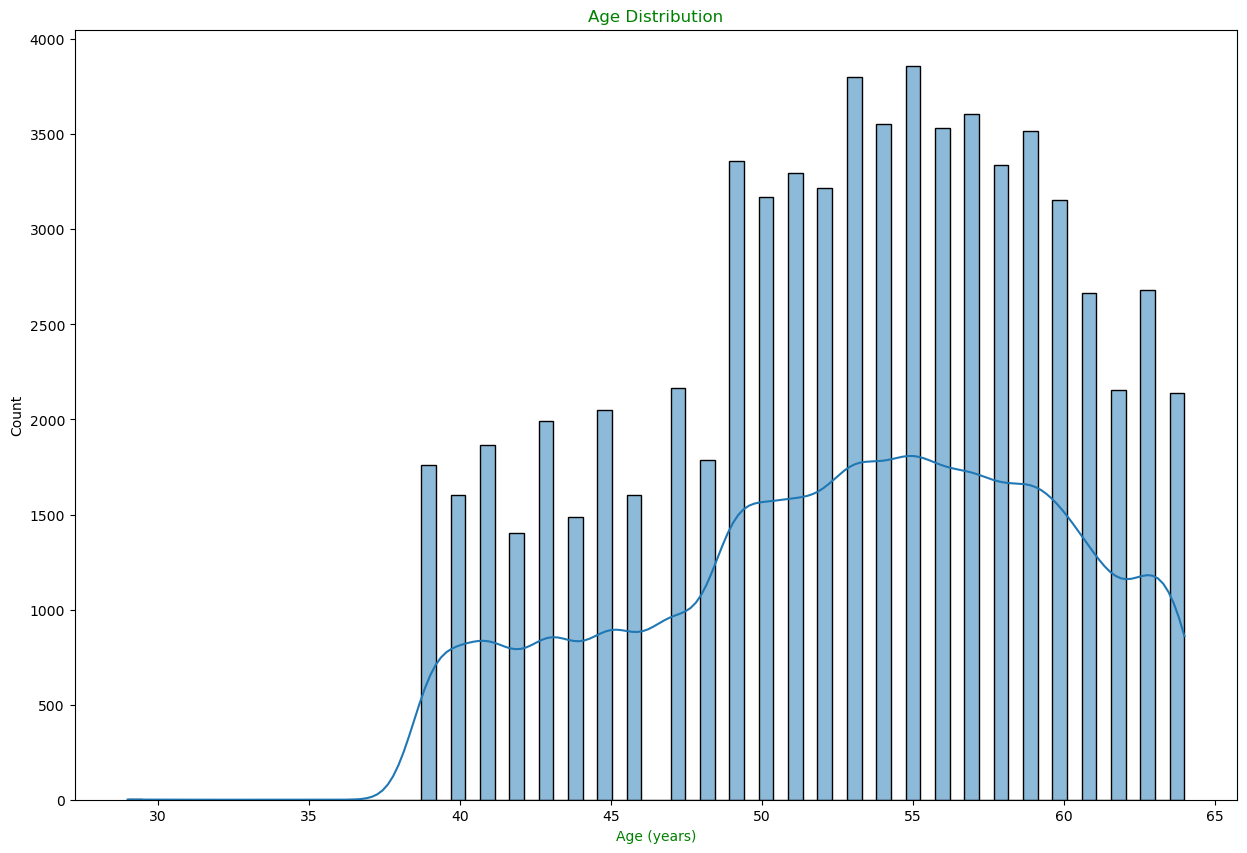

In [15]:
# Plot histogram of age in years
plt.figure(figsize=(15,10))
sns.histplot(x="age", data=df_clean,kde=True)
plt.xlabel("Age (years)",color="g")
plt.title("Age Distribution",color="g")
plt.show()

We observe that the **age** variable is approximately **normally distributed**, with most values symmetrically centered around the **mean**. This suggests that age follows a bell-shaped distribution, which is useful for statistical modeling and inference.


c:\Users\HomePC\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


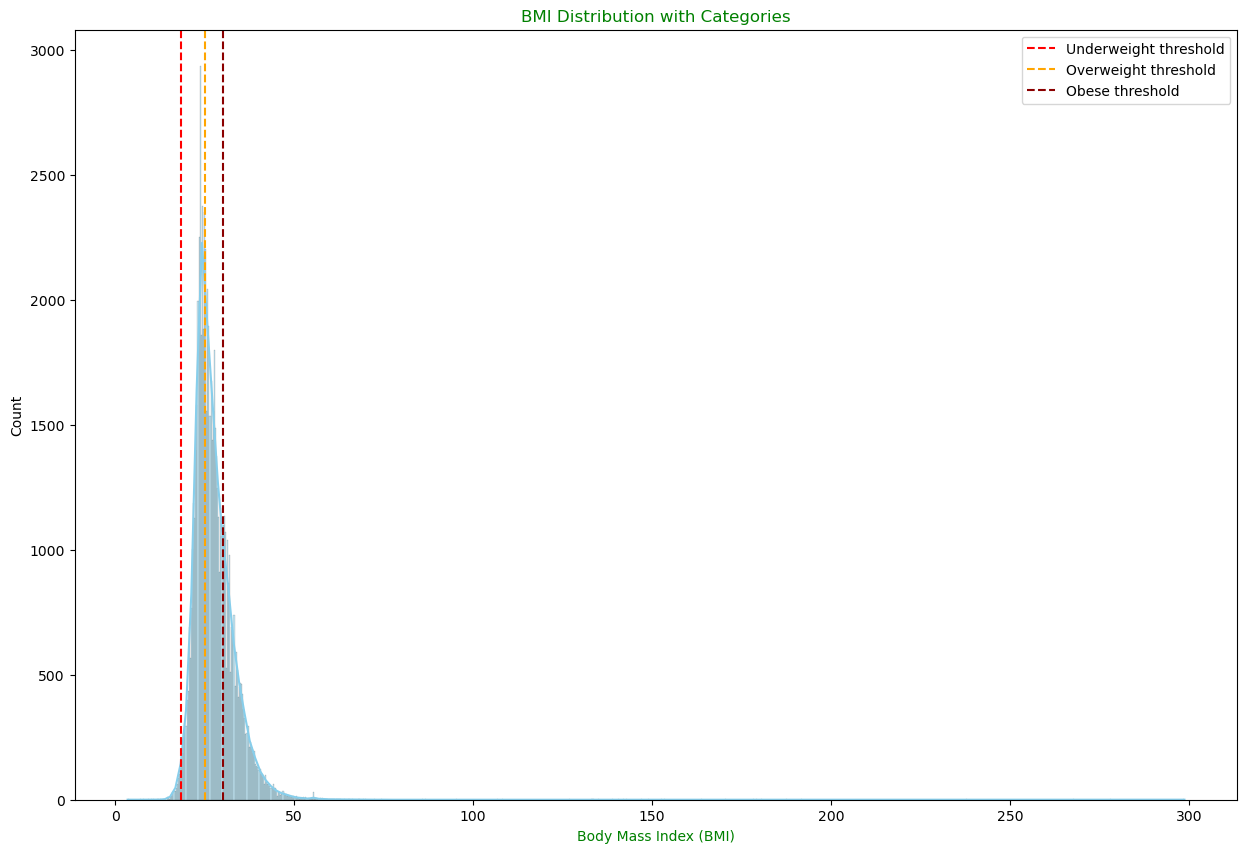

In [16]:

# Plot BMI histogram
plt.figure(figsize=(15,10))
sns.histplot(x="BMI", data=df_clean, kde=True, color='skyblue')

# Add vertical lines for category thresholds
plt.axvline(x=18.5, color='red', linestyle='--', label='Underweight threshold')
plt.axvline(x=25, color='orange', linestyle='--', label='Overweight threshold')
plt.axvline(x=30, color='darkred', linestyle='--', label='Obese threshold')

# Customize plot
plt.xlabel("Body Mass Index (BMI)",color="g")
plt.title("BMI Distribution with Categories",color="g")
plt.legend()
plt.show()

 The **BMI** variable appears to be **normally distributed**, with most values symmetrically centered around the **overweight threshold**. 


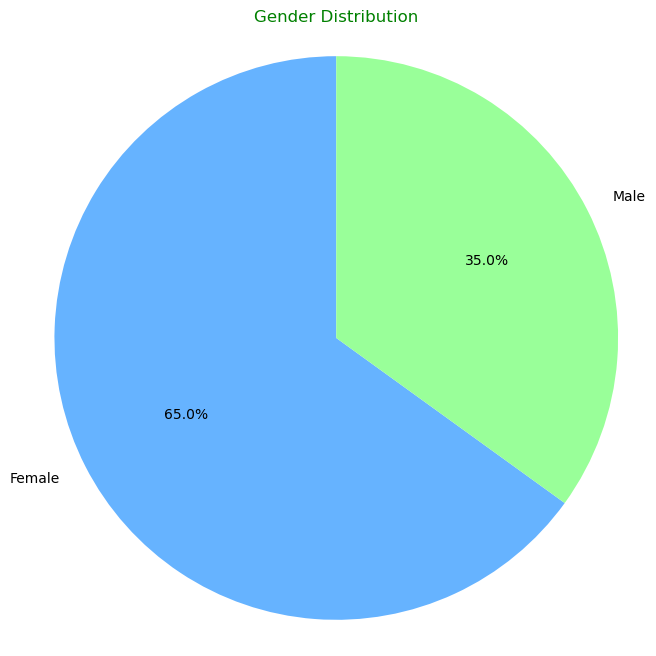

In [17]:
# Gender value counts
gender_value_counts = df_new["gender"].value_counts()

# Labels for the pie chart (assuming 0 = female, 1 = male)
labels = ['Female', 'Male']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_value_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Gender Distribution', color='green')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.

plt.show()


There are significantly more records for **females** than **males** in the dataset. This imbalance could **skew the analysis**, particularly in any comparisons or models involving gender as a factor.


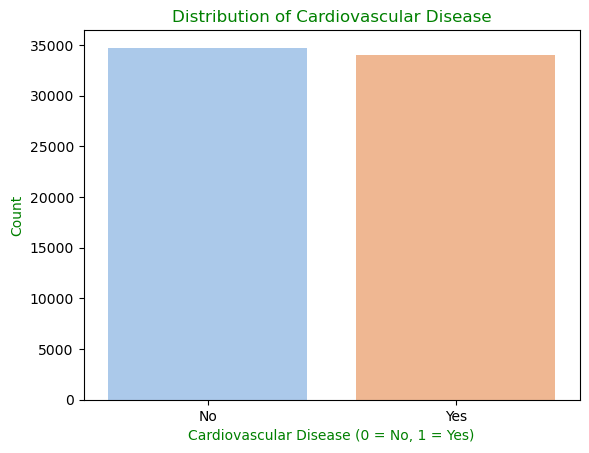

In [18]:
# Get value counts of the target variable
cardio_counts = df_clean["cardio"].value_counts()

# Create the figure and bar plot
plt.Figure(figsize=(10, 6))  
sns.barplot(x=cardio_counts.index, y=cardio_counts.values, palette="pastel")

# Add labels and title
plt.xlabel("Cardiovascular Disease (0 = No, 1 = Yes)",color="g")
plt.ylabel("Count",color="g")
plt.title("Distribution of Cardiovascular Disease",color="g")
plt.xticks([0, 1], ["No", "Yes"])

plt.show()


The dataset contains an approximately **equal number of individuals with and without cardiovascular disease**, indicating that the target variable is **balanced**. This is beneficial for training machine learning models, as it reduces the risk of bias toward one class.


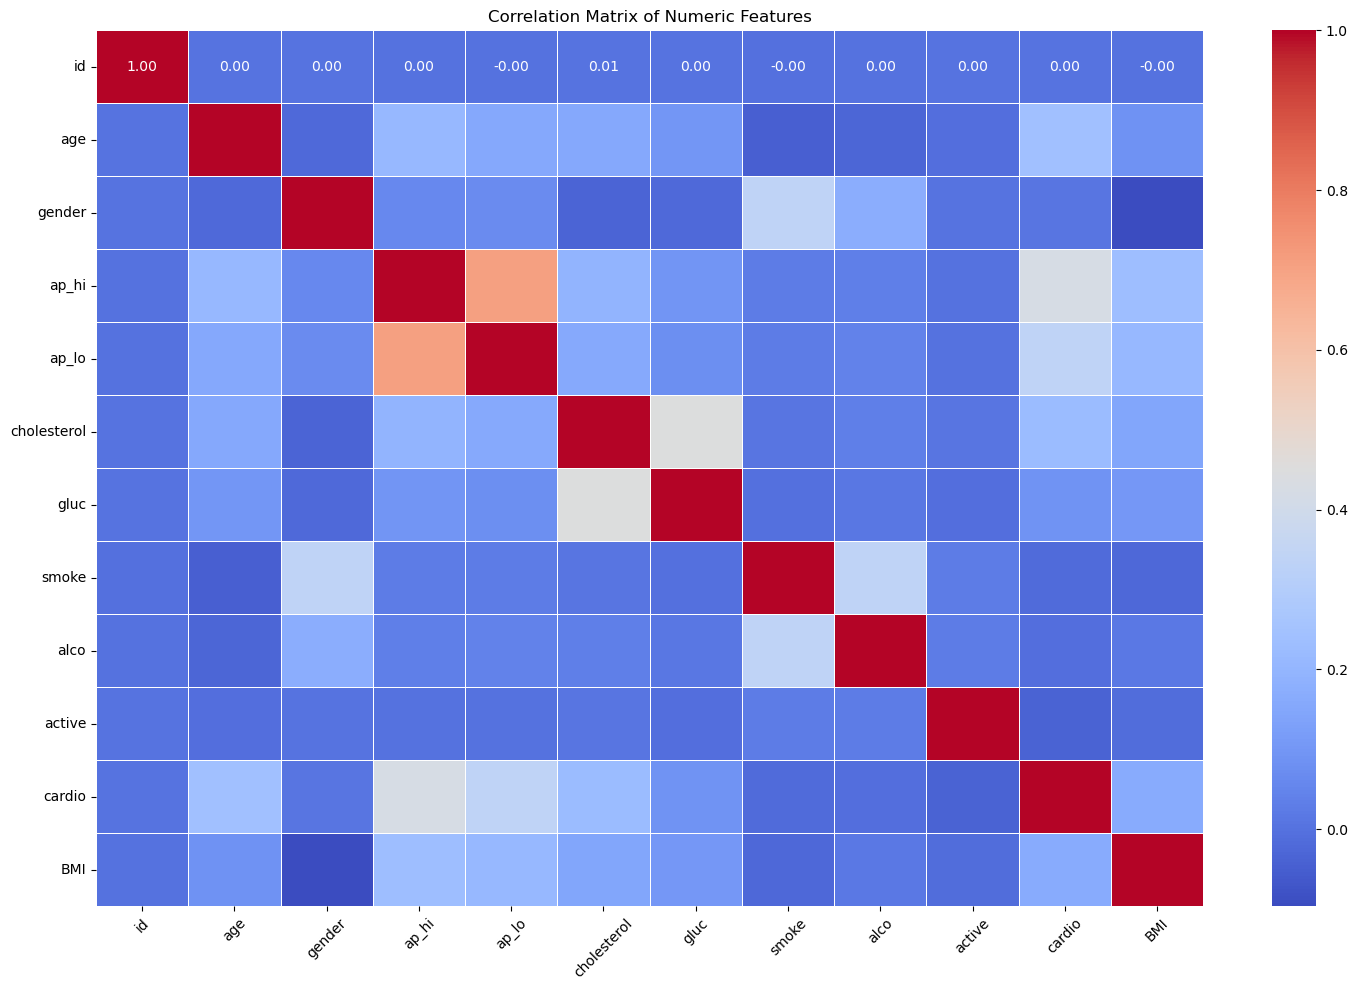

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,1.000000,0.003885,0.002964,0.001327,-0.001141,0.005829,0.002141,-0.003403,0.000544,0.003757,0.003801,-0.001897
age,0.003885,1.000000,-0.023384,0.208083,0.153925,0.155017,0.098772,-0.047904,-0.029153,-0.010527,0.239318,0.086642
gender,0.002964,-0.023384,1.000000,0.061194,0.067994,-0.036616,-0.020991,0.338837,0.171391,0.005909,0.007203,-0.096588
ap_hi,0.001327,0.208083,0.061194,1.000000,0.706408,0.194162,0.092877,0.027093,0.033035,-0.001159,0.425609,0.232071
ap_lo,-0.001141,0.153925,0.067994,0.706408,1.000000,0.159783,0.075081,0.025834,0.041167,-0.000057,0.337480,0.208484
cholesterol,0.005829,0.155017,-0.036616,0.194162,0.159783,1.000000,0.451110,0.009875,0.035383,0.008897,0.221548,0.146346
gluc,0.002141,0.098772,-0.020991,0.092877,0.075081,0.451110,1.000000,-0.005653,0.010761,-0.007549,0.090058,0.101793
smoke,-0.003403,-0.047904,0.338837,0.027093,0.025834,0.009875,-0.005653,1.000000,0.340306,0.025468,-0.016229,-0.027980
alco,0.000544,-0.029153,0.171391,0.033035,0.041167,0.035383,0.010761,0.340306,1.000000,0.024896,-0.008576,0.014856
active,0.003757,-0.010527,0.005909,-0.001159,-0.000057,0.008897,-0.007549,0.025468,0.024896,1.000000,-0.037233,-0.014344


In [19]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the plot
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f",
    annot_kws={"size": 10}  
)

plt.title("Correlation Matrix of Numeric Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
correlation_matrix



## *Bar plots of each predictor variable against the target variable*

### *Cardio Condition By Smoking Status*

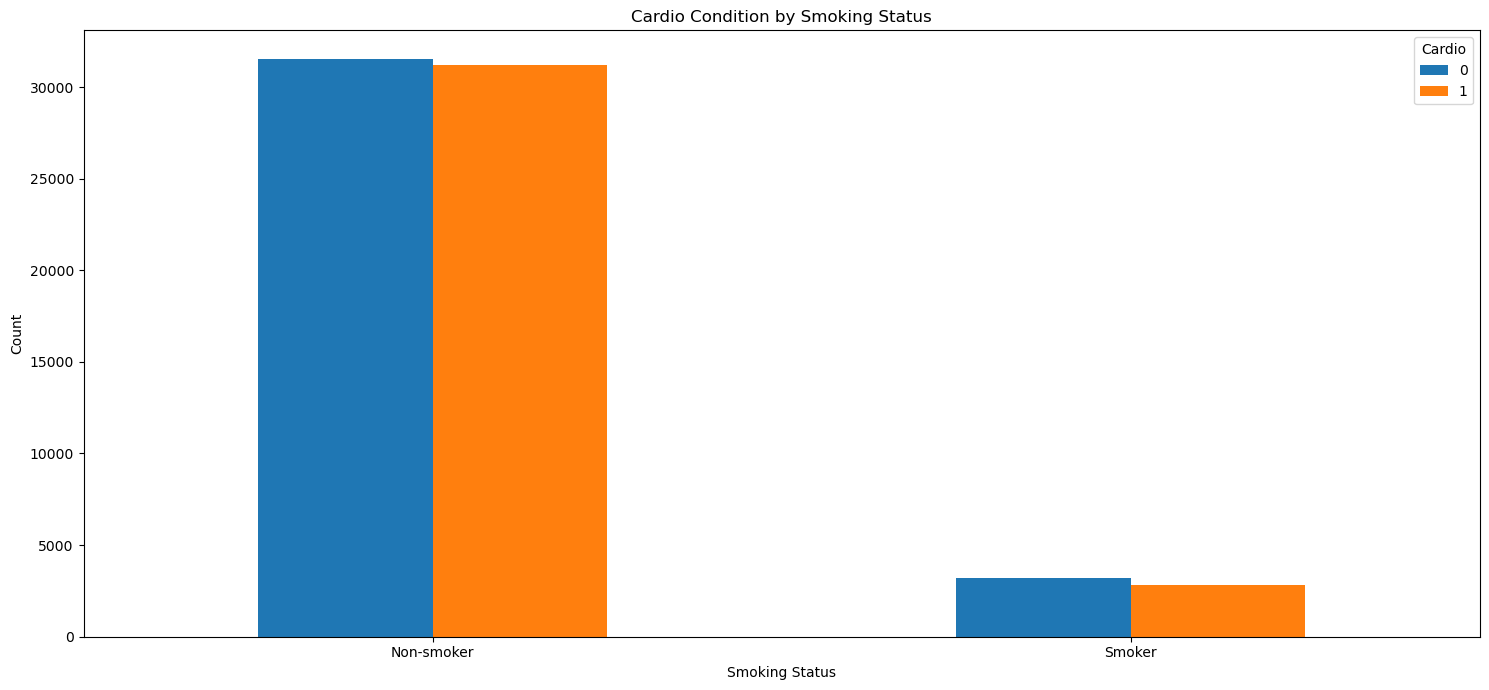

In [20]:
# plotting bar graph of smokers vs cardio
grouped_smoker = df_clean.groupby(["smoke", "cardio"]).size().unstack()
ax = grouped_smoker.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Non-smoker", "Smoker"], rotation=0)
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Smoking Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

We observe that **smokers and non-smokers exhibit a similar risk** of developing cardiovascular disease in this dataset. This suggests that, based on the available data, **smoking may not be a strong differentiating factor** for cardiovascular risk, though this could be influenced by other confounding variables.


### *Cardio Condition By Alcohol Status*

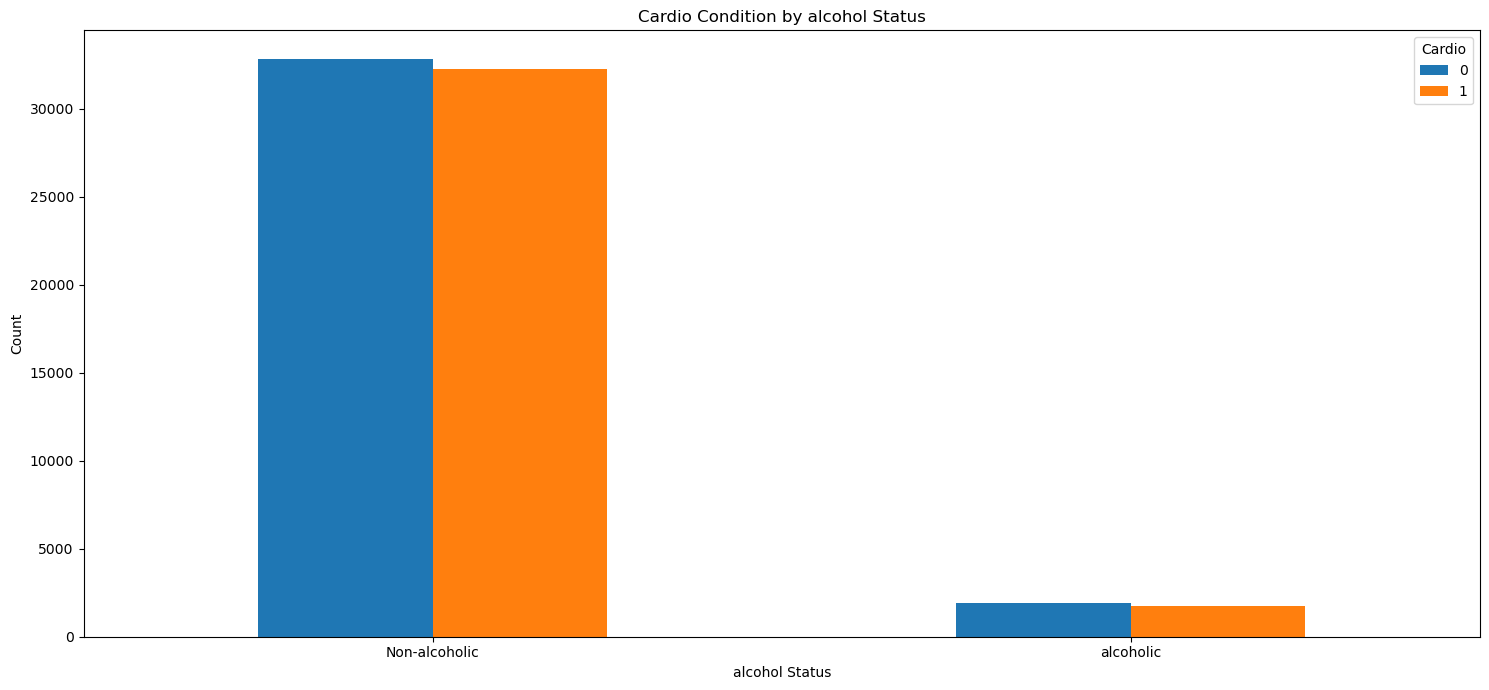

In [21]:
# ploting bar graph of alcohol vs cardio
grouped_alcohol = df_clean.groupby(["alco", "cardio"]).size().unstack()
ax = grouped_alcohol.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Non-alcoholic", "alcoholic"], rotation=0)
plt.xlabel("alcohol Status")
plt.ylabel("Count")
plt.title("Cardio Condition by alcohol Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

The data shows that **alcoholics and non-alcoholics have a similar risk** of developing cardiovascular disease. This suggests that **alcohol consumption may not be a distinguishing factor** for cardiovascular risk in this dataset, although other underlying variables could be at play.


### *Cardio Condition By Cholesterol Level*

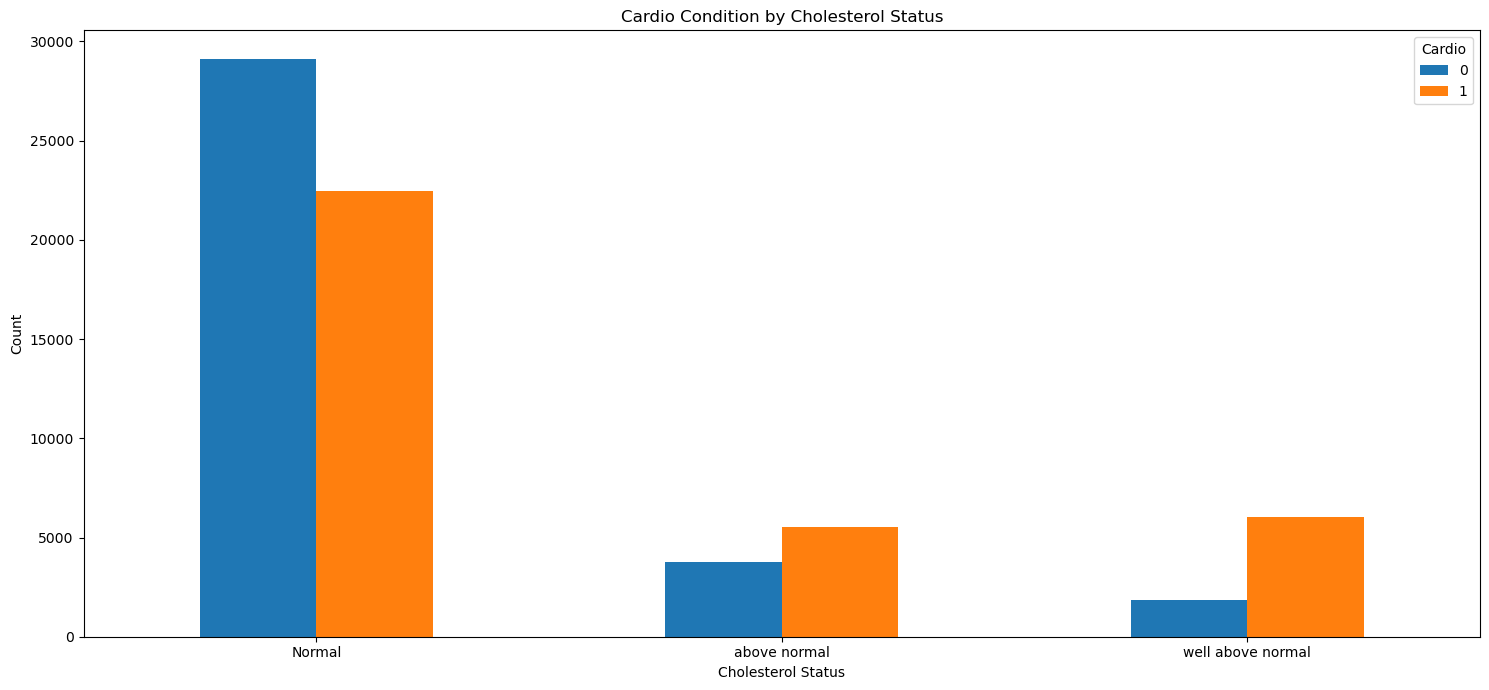

In [22]:
# plotting bar graph of smokers vs cardio
grouped_chole = df_clean.groupby(["cholesterol", "cardio"]).size().unstack()
ax = grouped_chole.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Normal", "above normal","well above normal"], rotation=0)
plt.xlabel("Cholesterol Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Cholesterol Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

From the plot, we observe that individuals with **normal cholesterol levels** are at a **lower risk** of developing cardiovascular disease. In contrast, those with **well above normal** cholesterol levels face the **highest risk**, followed by those with **above normal** levels. This suggests a strong positive correlation between elevated cholesterol and cardiovascular risk.



### *Cardio Condition By Physical Activity*

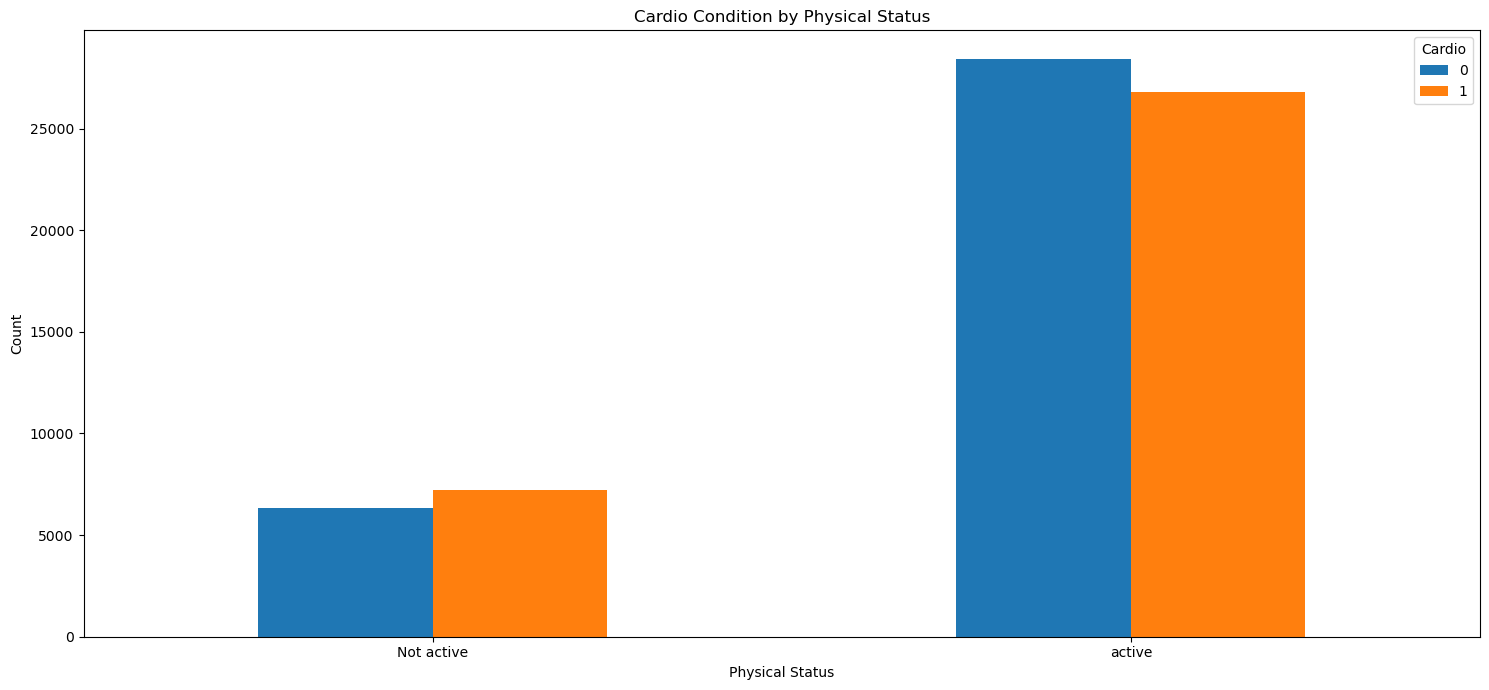

In [23]:
# plotting bar graph of physical activity vs cardio condition
grouped_phyc = df_clean.groupby(["active", "cardio"]).size().unstack()
ax = grouped_phyc.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Not active", "active"], rotation=0)
plt.xlabel("Physical Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Physical Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

From the plot, we observe that individuals who are **not physically active** have a **higher risk** of developing cardiovascular disease, while those who engage in **regular physical activity** show a **lower risk**. This highlights the potential protective effect of physical activity on heart health.


### *Cardio Condition By Glucose Level*

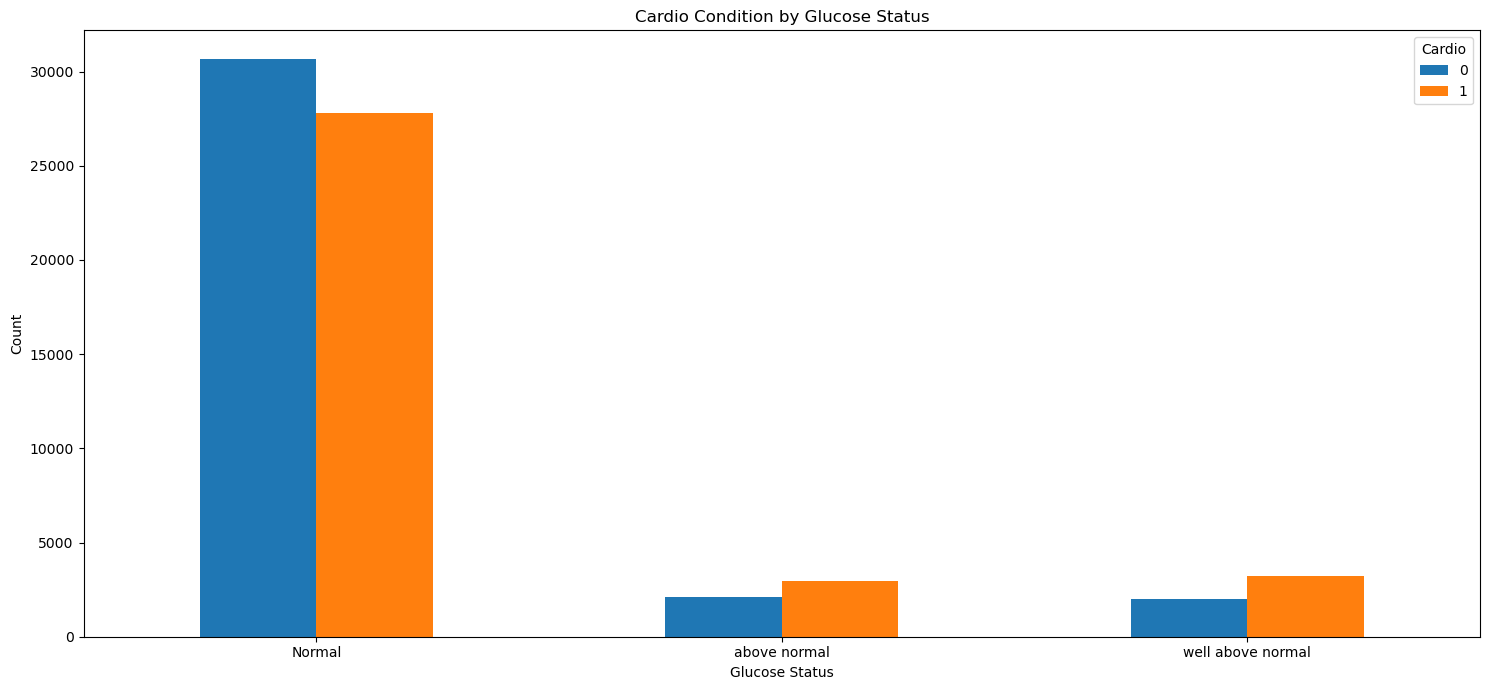

In [24]:
# plotting bar graph of glucose vs cardio
grouped_gluc = df_clean.groupby(["gluc", "cardio"]).size().unstack()
ax = grouped_gluc.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Normal", "above normal","well above normal"], rotation=0)
plt.xlabel("Glucose Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Glucose Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

The plot indicates that individuals with **well above normal glucose levels** face the **highest risk** of developing cardiovascular disease, followed by those with **above normal** glucose levels. In contrast, those with **normal glucose levels** are at a **lower risk**, suggesting a clear association between elevated glucose levels and cardiovascular risk.



### *Cardio Condition By Gender*

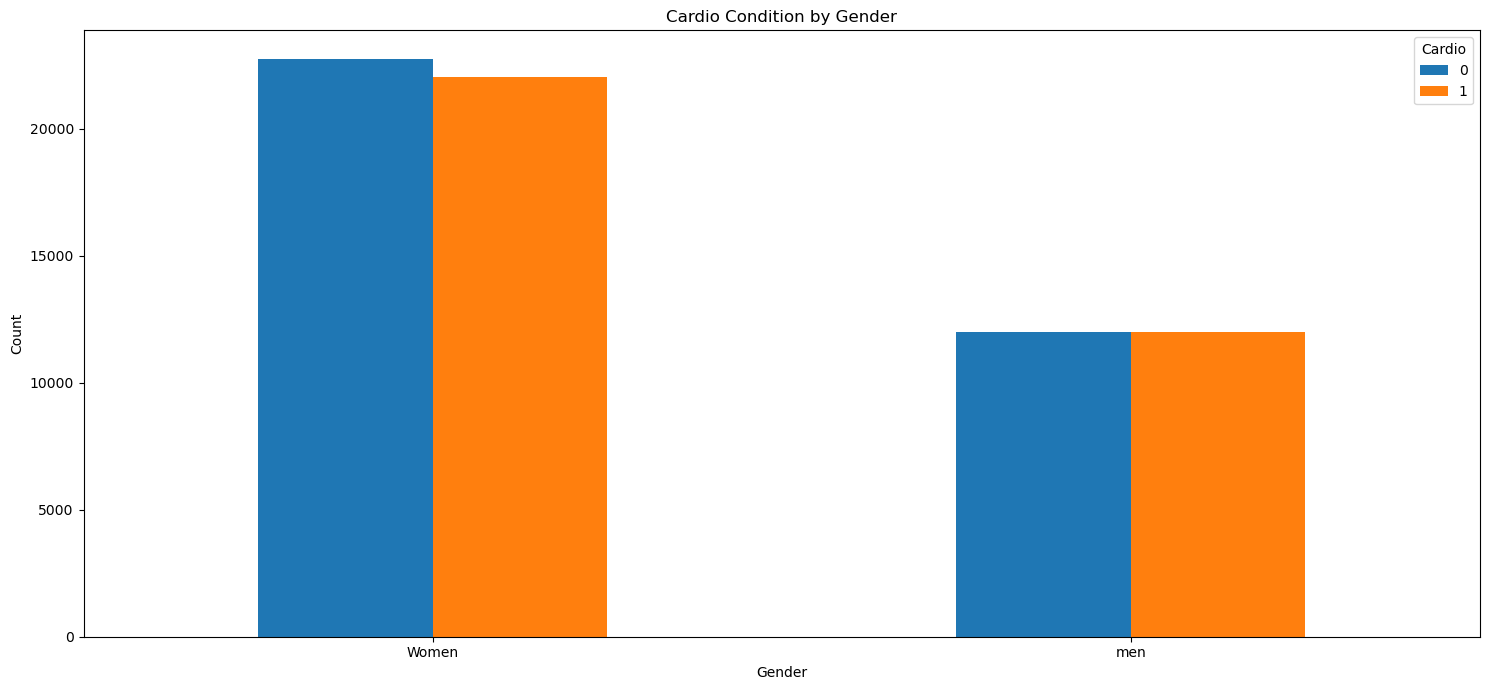

In [25]:
# plotting bar graph of smokers vs cardio
grouped_gender = df_clean.groupby(["gender", "cardio"]).size().unstack()
ax = grouped_gender.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Women", "men"], rotation=0)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Cardio Condition by Gender")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

The data shows that **men have a slightly higher risk** of developing cardiovascular disease compared to women. This suggests a modest gender-related difference in cardiovascular risk within the dataset.


### *Cardio Condition By Age Group*

C:\Users\HomePC\AppData\Local\Temp\ipykernel_10720\877401528.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age=df_clean.groupby(["age_group","cardio"])[["age_group","cardio"]].size().unstack().copy()


Text(0.5, 1.0, 'Cardio Condition by Age Group')

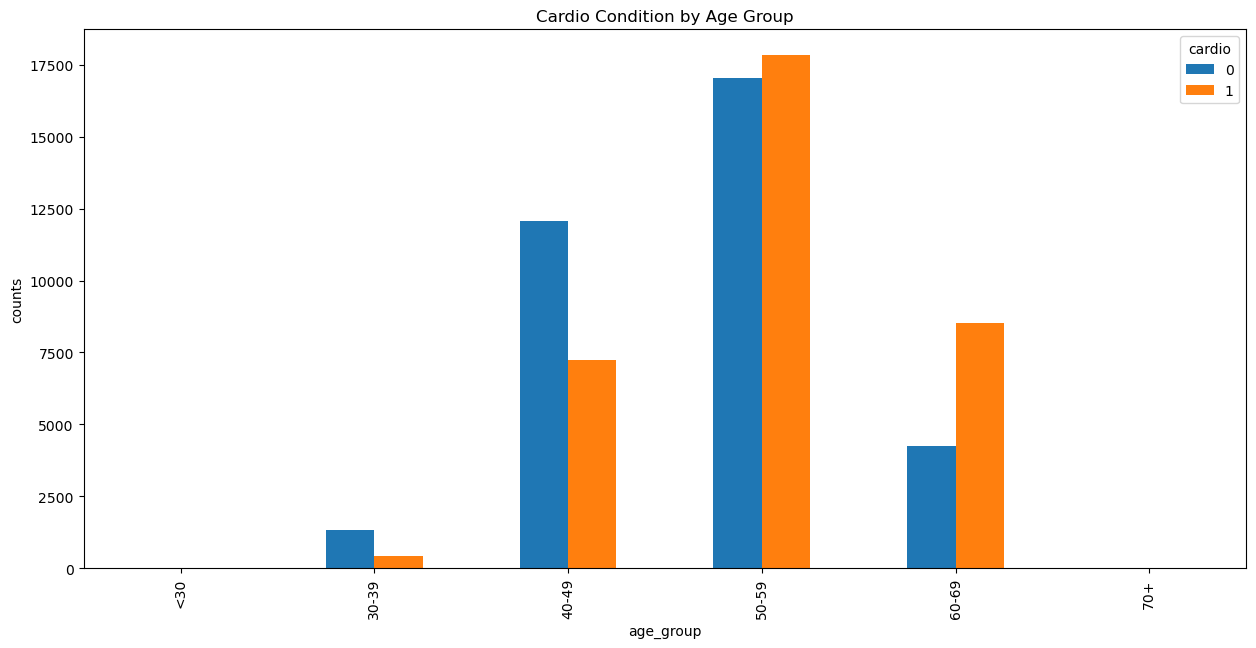

In [26]:

# Define bins and labels
bins = [0, 29, 39, 49, 59, 69, 120]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']

# Create age groups
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels,right=True)
grouped_age=df_clean.groupby(["age_group","cardio"])[["age_group","cardio"]].size().unstack().copy()
ax=grouped_age.plot(kind="bar",figsize=(15,7))
ax.set_ylabel("counts")
ax.set_xlabel("age_group")
ax.set_title("Cardio Condition by Age Group")




The analysis reveals that individuals **above the age of 50** have a **higher risk** of developing cardiovascular disease, with those **over 60 years old** facing the **highest risk**. Conversely, **younger individuals under 50** have a **lower risk** of developing cardiovascular disease, indicating a clear age-related increase in risk.


C:\Users\HomePC\AppData\Local\Temp\ipykernel_10720\1957930940.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_bmi=df_clean.groupby(["BMI_group","cardio"]).size().unstack()


Text(0.5, 1.0, 'Cardio Condition by BMI Group')

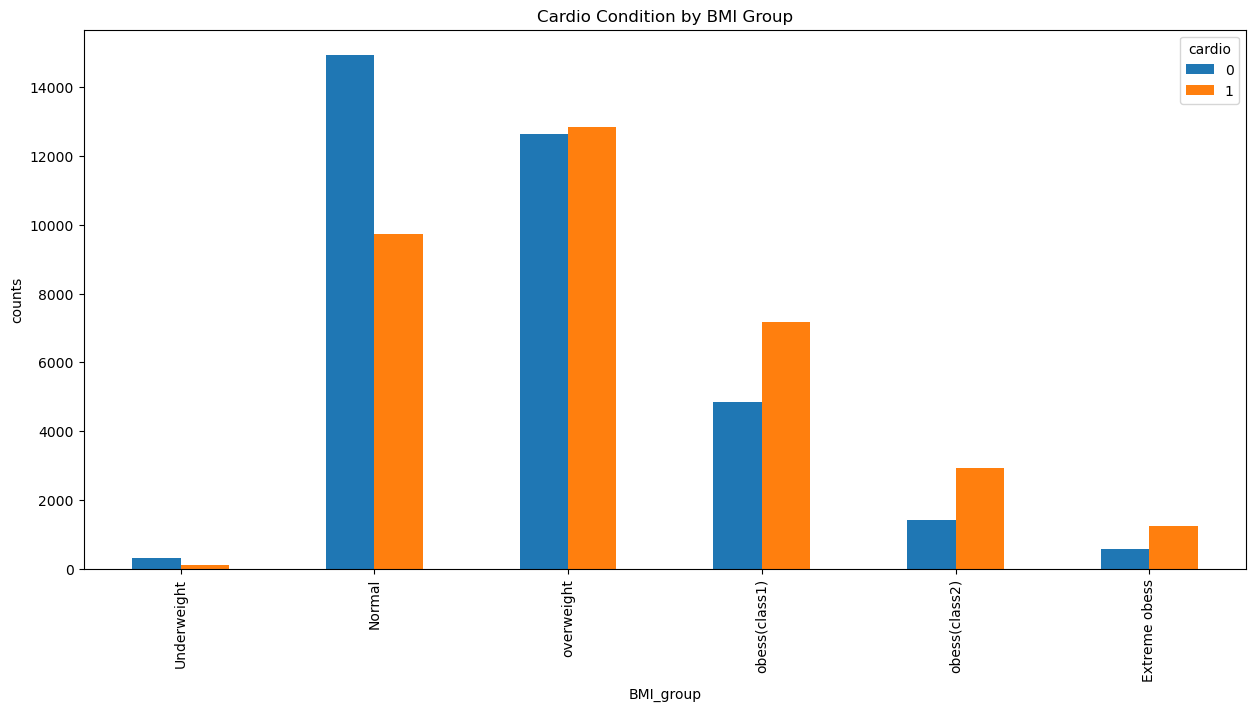

In [27]:
# Define Bins and labels
bins=[0,18,24.9,29.9,34.9,39.9,204]
labels=["Underweight","Normal","overweight","obess(class1)","obess(class2)","Extreme obess"]
df_clean["BMI_group"]=pd.cut(df_clean["BMI"],bins=bins,labels=labels,right=True)
grouped_bmi=df_clean.groupby(["BMI_group","cardio"]).size().unstack()
ax=grouped_bmi.plot(kind="bar",figsize=(15,7))
ax.set_ylabel("counts")
ax.set_xlabel("BMI_group")
ax.set_title("Cardio Condition by BMI Group")

We observe that individuals with **underweight** or **normal weight** classifications tend to have a **lower risk of cardiovascular disease**. In contrast, those categorized as **overweight**, **obese (Class I)**, **obese (Class II)**, and **extremely obese** show a **progressively higher risk**, with the likelihood of cardiovascular disease increasing across these categories.

These observations suggest a potential link between **increased body weight** and **greater susceptibility to cardiovascular conditions**, indicating that weight management may be an important factor in reducing cardiovascular risk.






## **Data Preprocessing**

## *Label Encoding the Gender Column*


In [28]:
df_preprocess=df_clean.copy()
df_preprocess["gender"].replace({"1":0,"2":1},inplace=True)
df_preprocess.sample(5)


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_group,BMI_group
31956,45637,49,1,120,80,1,1,0,0,1,0,23.437500,40-49,Normal
66034,94268,45,2,120,80,1,2,0,0,1,0,31.435911,40-49,obess(class1)
18262,26083,52,1,130,80,1,1,0,0,1,0,29.043709,50-59,overweight
67547,96445,53,1,140,90,1,1,0,0,1,1,24.801587,50-59,Normal
24928,35608,61,2,120,80,1,1,0,0,1,1,24.221453,60-69,Normal


## *dropping unnecessary columns*


In [29]:
df_preprocess.drop(["BMI_group","age_group","id"],axis=1,inplace=True)

## *Checking For Normality Of The Numeric Columns*

Checking for normality in numerical columns is important because many statistical models and tests (e.g., linear regression, logistic regression, ANOVA) assume that the input data or residuals are normally distributed. If this assumption is violated, model estimates may become biased or inefficient. Identifying non-normal distributions allows for appropriate transformations (e.g., log, Box-Cox) to improve model accuracy, reliability, and interpretability. It also helps ensure that the results of inferential statistics are valid.


In [30]:
#checking for normality before scaling
numeric_cols = ["age","ap_hi","ap_lo","BMI"]
print("Normality Check Before Scaling:")
for col in numeric_cols:
    data = df_preprocess[col].dropna()
    stat_shapiro, p_shapiro = stats.shapiro(data)
    stat_norm, p_norm = stats.normaltest(data)
    print(f"{col}: Shapiro-Wilk p = {p_shapiro:.4f} {'(Not Normal)' if p_shapiro < 0.05 else '(Normal)'}")
    print("-" * 50)

Normality Check Before Scaling:
age: Shapiro-Wilk p = 0.0000 (Not Normal)
--------------------------------------------------
ap_hi: Shapiro-Wilk p = 0.0000 (Not Normal)
--------------------------------------------------
ap_lo: Shapiro-Wilk p = 0.0000 (Not Normal)
--------------------------------------------------
BMI: Shapiro-Wilk p = 0.0000 (Not Normal)
--------------------------------------------------


c:\Users\HomePC\anaconda3.1\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since none of the numeric columns follow a normal distribution, we will first assess their skewness to determine the appropriate transformation needed to improve their distribution.
Skewness measures the asymmetry of the data distribution. Values far from zero indicate a highly skewed distribution. 

In [31]:
# Skewness check to identify candidates for log transformation
print("\nSkewness Check:")
skewed = df_preprocess[numeric_cols].skew().sort_values(ascending=False)
print(skewed)




Skewness Check:
BMI      7.783431
ap_hi    0.905402
ap_lo    0.440167
age     -0.304465
dtype: float64


Here, `ap_hi`, and `BMI` exhibit substantial positive skewness, suggesting a long right tail, while `age` shows a slight negative skewness, indicating a mild left tail. These results highlight the need for appropriate transformations, such as log transformation, to reduce skewness and improve model performance.


## *Log Transforming Positively Skewed Columns*

Log transformation was applied to reduce the high positive skewness observed in several numerical features. By compressing large values and spreading out smaller ones, the log transform helps make the data distribution more symmetric and closer to normal. This often improves model performance and stability, especially for algorithms sensitive to feature distributions.


In [32]:
# Handle only positive-skewed, positive-valued columns
for col in ["ap_hi", "BMI"]:
    df_preprocess[col] = np.log1p(df_preprocess[col])



In [33]:
# Check for NaN in my features
print(df_preprocess.isna().sum())        


age            0
gender         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
BMI            0
dtype: int64


After applying a log transformation, it's important to check the skewness of the columns in the resulting dataframe to verify whether the transformation successfully reduced skewness and improved the distribution.


In [34]:
# Skewness for the log transformed columns
print("\nSkewness Check:")
skewed = df_preprocess[numeric_cols].skew().sort_values(ascending=False)
print(skewed)


Skewness Check:
BMI      0.926527
ap_lo    0.440167
ap_hi    0.362157
age     -0.304465
dtype: float64


Compared to the original values, the skewness of most features has decreased significantly, indicating a more symmetric distribution. While some skewness remains, especially in `ap_lo`, the transformation has effectively reduced extreme skewness, which can help improve model performance and the reliability of statistical analyses.


## *Checking For Multicollineariry*
Checking for multicollinearity is important because highly correlated features can lead to unstable coefficients, reduced interpretability, and poor model performance. Identifying and addressing multicollinearity ensures more reliable and robust models, especially for linear algorithms.


In [35]:
# checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For a DataFrame X
vif = pd.DataFrame()
vif["feature"] = df_preprocess.drop("active",axis=1).columns
vif["VIF"] = [variance_inflation_factor(df_preprocess.drop("cardio",axis=1).values, i) for i in range(df_preprocess.drop("cardio",axis=1).shape[1])]
vif

,feature,VIF
0,age,66.221345
1,gender,10.406652
2,ap_hi,573.265619
3,ap_lo,102.397291
4,cholesterol,6.558889
5,gluc,7.047507
6,smoke,1.368038
7,alco,1.204051
8,cardio,5.081125
9,BMI,371.028512


We observe high multicollinearity among several features, particularly `age`, `ap_hi`, `ap_lo`, and `BMI`. Since all of these variables are important for predictive purposes, we cannot drop any of them from the model. To address this issue, we will apply **regularization techniques** (such as Lasso or Ridge regression), which can mitigate the impact of multicollinearity by penalizing large coefficients and improving model stability.


## *defining features and the target*

Defining the features (`X`) and target (`y`) before modeling is essential because it clearly separates the input variables from the outcome we are trying to predict. This separation ensures that the model learns patterns only from the appropriate predictors and not from the outcome itself. Additionally, it allows for consistent preprocessing, model training, and evaluation workflows, helping to prevent data leakage and ensuring reproducibility of results.


In [36]:
# defining X and y
X=df_preprocess.drop(["cardio"],axis=1)
y=df_preprocess["cardio"].astype(int)

## *Train-test-split*

Here, we split the data into a training set and a testing set. The training set is used to train the model, while the testing set is reserved to evaluate how well the model generalizes to unseen data.

We split the data into 80 percent training set and 20 percent test set.

In [37]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## *Normalizing Columns*

Normalization ensures that features are on a similar scale, which is important for models that are sensitive to feature magnitude (e.g., logistic regression, SVM, KNN). For **continuous** features, it prevents those with large ranges from dominating the learning process. For **ordinal encoded** features, it avoids exaggerating differences between levels. Overall, normalization improves model performance, convergence speed, and ensures fair treatment of all features during training. 

We will do so using MinMaxScaler from sklearn


In [38]:
# defining scaling columns
scale_columns=["age","ap_hi","ap_lo","BMI","cholesterol","gluc"]
X_test_scale=X_test[scale_columns]
X_train_scale=X_train[scale_columns]
X_test_cat=X_test.drop(scale_columns,axis=1).astype(int)
X_train_cat=X_train.drop(scale_columns,axis=1).astype(int)

In [39]:
# instatiating the scaler
scaler=MinMaxScaler()
# scaling and changing the resulting array to a dataframe
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train_scale),index=X_train_scale.index,columns=X_train_scale.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test_scale),index=X_test_scale.index,columns=X_test_scale.columns)
X_test_scaled


,age,ap_hi,ap_lo,BMI,cholesterol,gluc
66628,0.571429,0.436219,0.363636,0.477722,0.0,0.5
61824,0.657143,0.436219,0.363636,0.467616,0.0,0.0
20420,0.742857,0.561386,0.454545,0.418673,0.0,0.0
6805,0.428571,0.561386,0.272727,0.452706,0.0,0.0
12602,0.857143,0.436219,0.363636,0.410833,0.0,0.0
...,...,...,...,...,...,...
69755,0.342857,0.617453,0.454545,0.501055,0.0,0.0
52932,0.685714,0.436219,0.363636,0.406935,0.0,1.0
33830,0.800000,0.501194,0.454545,0.477271,1.0,0.5
51498,0.800000,0.288385,0.181818,0.365834,0.0,0.0


In [40]:
# adding normalized columns to the rest of the columns
X_test=pd.concat([X_test_scaled,X_test_cat],axis=1)
X_train=pd.concat([X_train_scaled,X_train_cat],axis=1)



## **Modelling**

## *baseline logistic regression model*

We use the baseline model as an inferential tool to assess the overall significance of the model, as well as the statistical significance and impact of individual features.



In [41]:
#fitting a logistic reg model
model=sm.Logit(y_train,sm.add_constant(X_train))
results=model.fit(maxiter=200)
# viewing the model summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.561335
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                55003
Model:                          Logit   Df Residuals:                    54992
Method:                           MLE   Df Model:                           10
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                  0.1901
Time:                        14:42:29   Log-Likelihood:                -30875.
converged:                       True   LL-Null:                       -38121.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.2789      0.125    -58.448      0.000      -7.523      -7.035
age             1.7276      0.053     32.797      0.000       1.624       1.831
ap_hi           8.5119      0.156     54.660      0.000       8.207       8.817
ap_lo           1.7710      0.172     10.320      0.000       1.435       2.107
BMI             3.2036      0.244     13.136      0.000       2.726       3.682
cholesterol     1.0122      0.035     28.982      0.000       0.944       1.081
gluc           -0.2231      0.039     -5.656      0.000      -0.300      -0.146
gender          0.0204      0.022      0.933      0.351      -0.022       0.063
smoke          -0.1414      0.039     -3.647      0.000      -0.217      -0.065
alco           -0.2200      0.047     -4.705      0.000      -0.312      -0.128
active         -0.2144      0.024     -8.752      0.000      -0.262      -0.166
===============================================================================
"""

Based on the logistic regression results, the model is statistically significant, as indicated by the log-likelihood ratio p-value being well below the 0.05 threshold. This suggests that the model provides a better fit than a null model with no predictors.

Several features show strong and statistically significant associations with cardiovascular risk (CVR). Age, systolic blood pressure (ap_hi), diastolic blood pressure (ap_lo), BMI, cholesterol, and gender all have positive coefficients, meaning that increases in these features are associated with a higher likelihood of CVR. Notably, systolic blood pressure and BMI exhibit the strongest positive effects.

On the other hand, physical activity, alcohol use, smoking status, and glucose levels show negative associations with CVR. While the protective effect of physical activity aligns with expectations, the negative coefficients for glucose, smoking, and alcohol are counterintuitive. These may indicate issues such as class imbalance, multicollinearity, or data quality concerns, and should be further investigated.

Overall, the model demonstrates statistical significance and highlights several meaningful predictors of CVR, though some unexpected findings warrant additional analysis.

## *Finding the best perfoming model*

Here, we use the average **AUC** and **accuracy** scores obtained through cross-validation to identify the best-performing models. We selected these metrics because they provide complementary insights into model performance. **Accuracy** is suitable given that our dataset is balanced, allowing us to evaluate the proportion of correctly classified instances. 

**AUC** (Area Under the ROC Curve), on the other hand, measures the model's ability to distinguish between classes across all classification thresholds, offering a robust evaluation of discriminatory power. Using both metrics ensures that our selected models are not only accurate but also capable of effectively differentiating between the target classes.


In [42]:
def evaluate_model(model, X, y, name="Model"):
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
    print(f"{name} Accuracy: {scores.mean():.4f}")
    return scores


In [43]:
evaluate_model(LogisticRegression(max_iter=10000), X_train, y_train, "Logistic Regression")
evaluate_model(DecisionTreeClassifier(), X_train, y_train, "Decision Tree")
evaluate_model(RandomForestClassifier(), X_train, y_train, "Random Forest")
evaluate_model(XGBClassifier(), X_train, y_train, "XGboost")


Logistic Regression Accuracy: 0.7276
Decision Tree Accuracy: 0.6355
Random Forest Accuracy: 0.6890
XGboost Accuracy: 0.7333


array([0.72993364, 0.73320607, 0.73547859, 0.73363636, 0.73427273])

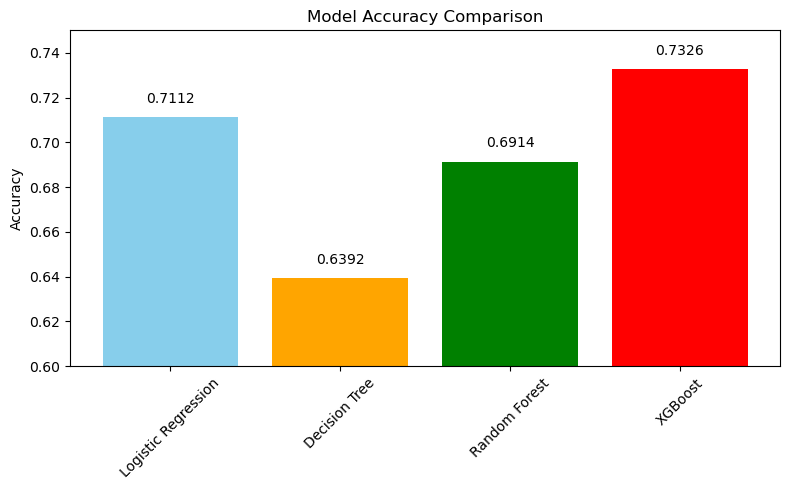

In [44]:
# Accuracy scores
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]
accuracies = [0.7112, 0.6392, 0.6914, 0.7326]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=["skyblue", "orange", "green", "red"])
plt.ylabel("Accuracy")
plt.ylim(0.6, 0.75)
plt.title("Model Accuracy Comparison")

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f"{acc:.4f}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c:\Users\HomePC\anaconda3.1\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


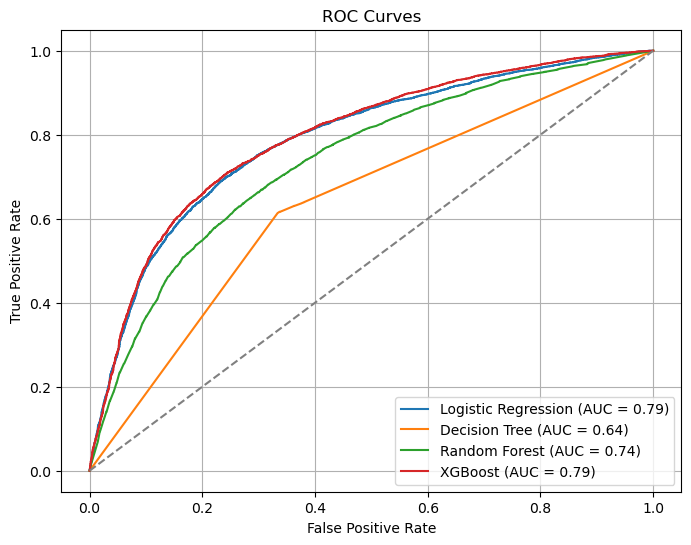

In [45]:
def plot_roc(model, X_test, y_test, label="Model"):
    y_probs = model.predict_proba(X_test)[:, 1]  # This must be supported
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

# Prepare plot
plt.figure(figsize=(8, 6))

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and plot
for name, model in models.items():
    model.fit(X_train, y_train)
    plot_roc(model, X_test, y_test, label=name)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()


Based on the cross-validation results, **Logistic Regression** and **XGBoost** emerged as the top-performing models in terms of both **AUC** and **accuracy**. These metrics consistently outperformed those of other models considered during the evaluation phase. Therefore, we selected Logistic Regression and XGBoost as our preferred models for further analysis and deployment.

We chose **accuracy** as one of our primary evaluation metrics because our dataset is **balanced**, meaning that the target classes are approximately equally represented. In such scenarios, accuracy provides a reliable and interpretable measure of model performance by accounting for both true positives and true negatives. Additionally, because false positives and false negatives carry similar consequences in our use case, accuracy remains a suitable metric. **AUC** further supports our model selection by quantifying the ability of each model to discriminate between the classes across different threshold settings.


## *Fitting a logistic regression model*

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     27820
           1       0.75      0.67      0.71     27183

    accuracy                           0.73     55003
   macro avg       0.73      0.73      0.73     55003
weighted avg       0.73      0.73      0.73     55003

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6914
           1       0.75      0.67      0.71      6837

    accuracy                           0.73     13751
   macro avg       0.73      0.73      0.73     13751
weighted avg       0.73      0.73      0.73     13751



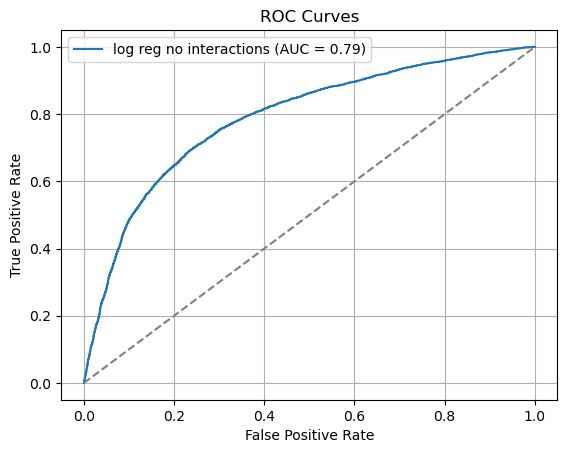

In [46]:
logreg=LogisticRegression(max_iter=10000,solver="liblinear")
logreg.fit(X_train,y_train)
#predicting the X_train
log_pred_train=logreg.predict(X_train)
print(classification_report(y_train,log_pred_train))
#predicting the X_test
log_pred_test=logreg.predict(X_test)
print(classification_report(y_test,log_pred_test))
plot_roc(logreg,X_test,y_test,"log reg no interactions")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()



The model shows consistent performance across both the training and test sets, suggesting good generalization and minimal overfitting.

The model achieved an accuracy of 73% on the training set. For class 0, the precision is 0.71, recall is 0.78, and the F1-score is 0.74, indicating strong ability to correctly identify negative class instances with relatively few false positives. For class 1, the precision is 0.75, recall is 0.67, and the F1-score is 0.71, showing a slightly higher precision but more missed true positives. The macro and weighted averages for precision, recall, and F1-score are all 0.73, reflecting balanced performance across both classes.

The model maintained an accuracy of 73% on the test set, mirroring the training performance. Class-wise, class 0 achieved a precision of 0.71, recall of 0.78, and F1-score of 0.74, while class 1 had a precision of 0.75, recall of 0.67, and F1-score of 0.71. Again, the macro and weighted averages are consistent at 0.73, demonstrating similar behavior on unseen data.

There is no significant difference between training and test set metrics. The parallel values in precision, recall, and F1-score across datasets suggest that the model generalizes well and is not overfitting.

### *Fitting A logistic Regression Model With Lasso*

Next, we will fit a logistic regression model with Lasso (L1) regularization, as our dataset contains features with high multicollinearity. This approach allows us to assess whether regularization improves the model's performance by reducing the impact of correlated features.


              precision    recall  f1-score   support

           0       0.71      0.78      0.74     27820
           1       0.75      0.67      0.71     27183

    accuracy                           0.73     55003
   macro avg       0.73      0.73      0.73     55003
weighted avg       0.73      0.73      0.73     55003

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6914
           1       0.75      0.67      0.71      6837

    accuracy                           0.73     13751
   macro avg       0.73      0.73      0.72     13751
weighted avg       0.73      0.73      0.72     13751



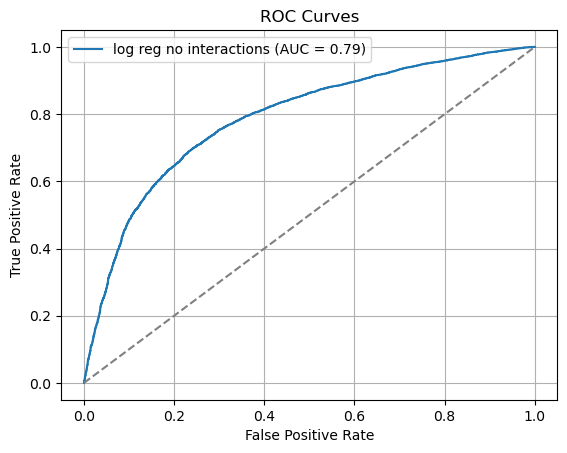

In [47]:
logreg=LogisticRegression(max_iter=10000,solver="liblinear",penalty="l1")
logreg.fit(X_train,y_train)
#predicting the X_train
log_pred_train=logreg.predict(X_train)
print(classification_report(y_train,log_pred_train))
#predicting the X_test
log_pred_test=logreg.predict(X_test)
print(classification_report(y_test,log_pred_test))
plot_roc(logreg,X_test,y_test,"log reg no interactions")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

The model demonstrates consistent and well-balanced performance across both the training and test datasets, indicating strong generalization with minimal signs of overfitting.

On the training set, the model achieved an accuracy of 73%. For class 0, the precision is 0.71, recall is 0.78, and F1-score is 0.74, showing strong ability to correctly identify the negative class with relatively few false positives. For class 1, the precision is 0.75, recall is 0.67, and F1-score is 0.71, reflecting slightly more false negatives but still maintaining a balanced profile. The macro and weighted averages for all metrics—precision, recall, and F1-score—are 0.73, reinforcing the model's even treatment of both classes.

The test set performance mirrors that of the training set with an accuracy of 73%. For class 0, the precision is 0.71, recall is 0.78, and F1-score is 0.74—identical to training results. For class 1, the precision remains 0.75, recall is 0.67, and F1-score is 0.71, again consistent with training. However, the macro and weighted F1-scores dipped slightly to 0.72, while precision and recall averages remain at 0.73.

Overall, the close alignment between training and test metrics indicates strong generalization and confirms that the model is not overfitting. The slight dip in F1-score on the test set is negligible and well within acceptable bounds.

### *Adding Interaction Terms*

After applying regularization, we will introduce interaction terms into the logistic regression model to evaluate whether capturing relationships between features can further enhance the model's performance.


In [48]:
interaction_generator = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_inter = interaction_generator.fit_transform(X_train)
X_test_inter = interaction_generator.transform(X_test)

In [49]:
input_features = X_train.columns
interaction_feature_names = interaction_generator.get_feature_names_out(input_features)

In [50]:
X_train_inter=pd.DataFrame(X_train_inter,index=X_train.index,columns=interaction_feature_names)
X_test_inter=pd.DataFrame(X_test_inter,index=X_test.index,columns=interaction_feature_names)

              precision    recall  f1-score   support

           0       0.72      0.75      0.74     27820
           1       0.74      0.71      0.72     27183

    accuracy                           0.73     55003
   macro avg       0.73      0.73      0.73     55003
weighted avg       0.73      0.73      0.73     55003

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      6914
           1       0.74      0.71      0.72      6837

    accuracy                           0.73     13751
   macro avg       0.73      0.73      0.73     13751
weighted avg       0.73      0.73      0.73     13751



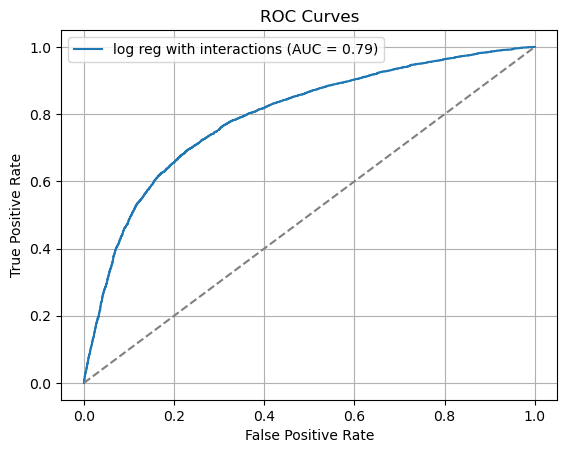

In [51]:
logreg=LogisticRegression(max_iter=10000,solver="liblinear",penalty="l1")
logreg.fit(X_train_inter,y_train)
#predicting the X_train
log_pred_train=logreg.predict(X_train_inter)
print(classification_report(y_train,log_pred_train))
#predicting the X_test
log_pred_test=logreg.predict(X_test_inter)
print(classification_report(y_test,log_pred_test))
plot_roc(logreg,X_test_inter,y_test,"log reg with interactions")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

The model continues to demonstrate reliable and well-balanced performance across both the training and test sets, indicating strong generalization with no signs of overfitting.

On the training set, the model achieved an accuracy of 73%. For class 0, the precision is 0.72, recall is 0.75, and F1-score is 0.74, showing effective detection of the negative class with balanced precision and recall. For class 1, the precision is 0.74, recall is 0.71, and F1-score is 0.72, indicating a slightly higher false negative rate, but overall solid classification of the positive class. The macro and weighted averages for precision, recall, and F1-score are all 0.73, reflecting consistent treatment of both classes.

On the test set, the model maintains the same accuracy of 73%, closely mirroring the training set's performance. Class 0 records a precision of 0.72, recall of 0.75, and F1-score of 0.74, while class 1 has a precision of 0.74, recall of 0.71, and F1-score of 0.72—identical to the training results. The macro and weighted averages across all metrics also remain steady at 0.73.

There is no measurable difference in class-wise or average performance between the training and test sets. This high level of consistency confirms the model generalizes well and is not overfitting to the training data.

### *Fitting a Logistic Regression Model With Binned Continuous Columns*

In [52]:
#  Copy original features
X_bin = X.copy()

# Extract the group columns from df_clean using the index
group_cols = df_clean[["BMI_group", "age_group"]]

#  Join the group columns to X_bin using an inner join on the index
X_bin = X_bin.join(group_cols, how="inner")

# Apply OrdinalEncoder to the two new categorical columns
oe = OrdinalEncoder()
X_bin[["BMI_group", "age_group"]] = oe.fit_transform(X_bin[["BMI_group", "age_group"]])
# apply scaler
X_bin[["BMI_group", "age_group"]] = scaler.fit_transform(X_bin[["BMI_group", "age_group"]])


# Drop the original numerical columns
X_bin.drop(["BMI", "age"], axis=1, inplace=True)



In [53]:
X_bin["BMI_group"].fillna(X_bin["BMI_group"].median(),inplace=True)


In [54]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_bin,y,test_size=0.2,random_state=42)

In [55]:
X_train1.dtypes

gender           int64
ap_hi          float64
ap_lo            int32
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
BMI_group      float64
age_group      float64
dtype: object

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     27820
           1       0.75      0.67      0.71     27183

    accuracy                           0.73     55003
   macro avg       0.73      0.72      0.72     55003
weighted avg       0.73      0.73      0.72     55003

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6914
           1       0.75      0.67      0.71      6837

    accuracy                           0.73     13751
   macro avg       0.73      0.72      0.72     13751
weighted avg       0.73      0.73      0.72     13751



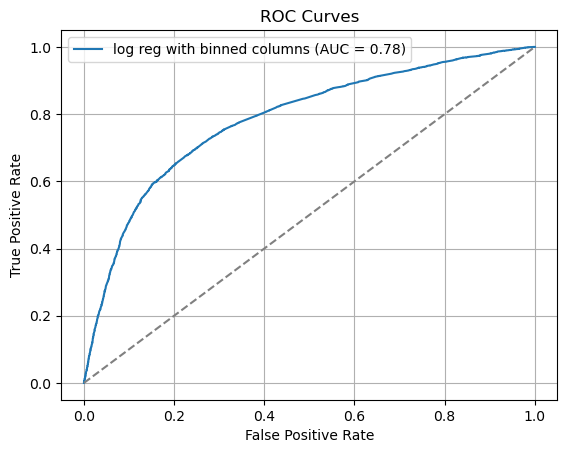

In [56]:
logreg=LogisticRegression(max_iter=10000,solver="liblinear",penalty="l1")
logreg.fit(X_train1,y_train1)
bin_train_pred=logreg.predict(X_train1)
print(classification_report(y_train1,bin_train_pred))
bin_test_pred=logreg.predict(X_test1)
print(classification_report(y_test1,bin_test_pred))
plot_roc(logreg,X_test1,y_test1,"log reg with binned columns")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

The model shows stable performance across both the training and test sets, with no major signs of overfitting. While the accuracy remains consistent, minor variations in class-level recall and macro averages suggest room for calibration, particularly in balancing sensitivity between the two classes.

On the training set, the model achieved an accuracy of 73%. For class 0, the precision is 0.71, recall is 0.78, and F1-score is 0.74, indicating effective identification of the negative class with relatively low false positives. For class 1, precision is 0.75, recall is 0.67, and F1-score is 0.71, highlighting a slightly higher false negative rate. The macro average F1-score is 0.72, and all weighted averages are also at 0.72–0.73, demonstrating reasonably balanced treatment of both classes, albeit with a small disparity in recall.

On the test set, the model maintained an accuracy of 73%, matching the training performance. Class 0 shows a precision of 0.70, recall of 0.78, and F1-score of 0.74, while class 1 has a precision of 0.75, recall of 0.67, and F1-score of 0.71. These values are very similar to the training set, though class 0 precision dropped slightly, suggesting a modest increase in false positives on unseen data. The macro and weighted averages are consistent at 0.72–0.73, reinforcing the overall stability of the model's performance.

In summary, the model generalizes well across both datasets. Slight dips in precision for class 0 and marginal class-level differences in recall are normal, and the close alignment of accuracy and average metrics confirms there is no overfitting.

## *Evaluating Logistic Regression Parameters*

### *bar plot of accuracies*

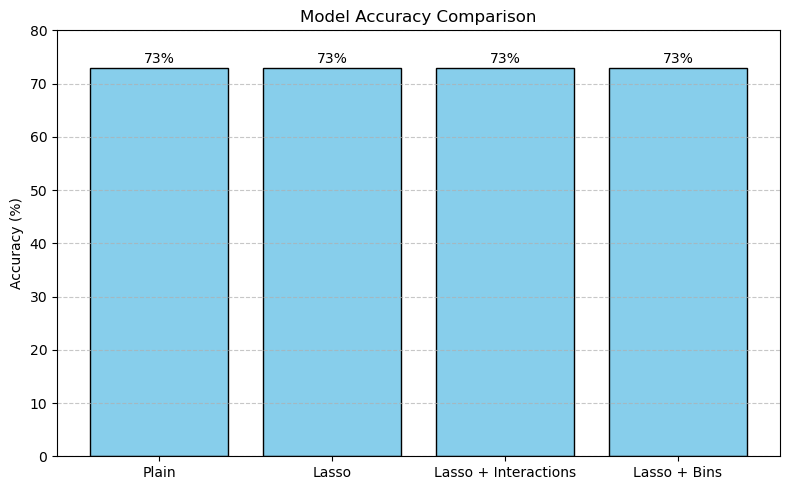

In [57]:
# Accuracy values and corresponding x-tick labels
accuracies = [73, 73, 73, 73]
xticks = ['Plain', 'Lasso', 'Lasso + Interactions', 'Lasso + Bins']

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(range(len(accuracies)), accuracies, color='skyblue', edgecolor='black')

# Add value labels on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(i, yval + 0.3, f'{yval}%', ha='center', va='bottom', fontsize=10)

# Set x-ticks and labels
plt.xticks(ticks=range(len(xticks)), labels=xticks)

# Customize plot
plt.ylim(0, 80)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


From the plot, we observe that the accuracy score remains stable even after applying Lasso regularization and including interaction terms.

### *bar plot of auc*

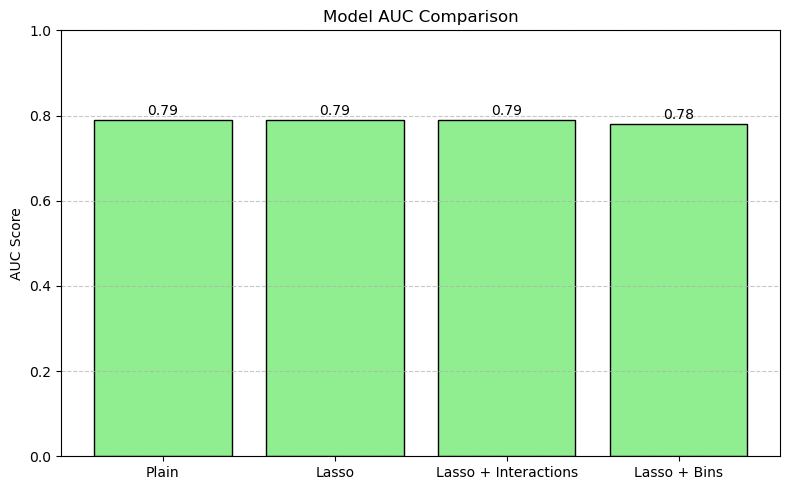

In [58]:
# AUC values and corresponding x-tick labels
auc_scores = [0.79, 0.79, 0.79, 0.78]
xticks = ['Plain', 'Lasso', 'Lasso + Interactions', 'Lasso + Bins']

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(range(len(auc_scores)), auc_scores, color='lightgreen', edgecolor='black')

# Add value labels on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(i, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Set x-ticks and labels
plt.xticks(ticks=range(len(xticks)), labels=xticks)

# Customize plot
plt.ylim(0, 1)
plt.ylabel('AUC Score')
plt.title('Model AUC Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The model’s AUC scores across different configurations demonstrate largely stable and robust performance with only minor variations due to feature engineering and regularization methods. The baseline plain model achieves an AUC of 0.79, providing a solid reference point. Introducing Lasso regularization maintains this score at 0.79, indicating that Lasso effectively selects important features without compromising the model’s ability to distinguish between classes.

Adding interaction terms alongside Lasso regularization also results in an unchanged AUC of 0.79. This suggests that the interaction features do not contribute additional predictive value, as the model’s discriminative power remains consistent.

However, when feature binning is combined with Lasso regularization, the AUC slightly decreases to 0.78. Though this drop is small, it indicates that discretizing continuous features may cause some information loss, marginally reducing the model’s sensitivity and overall classification performance.

Given these results, we will proceed with the model using only Lasso regularization as our preferred choice. This model balances feature selection and predictive performance effectively, maintaining strong AUC without the added complexity or potential drawbacks introduced by interactions or binning.

### *Hyperparameter Tuning Using Logistic RegressionCV*

In [59]:

# Initialize LogisticRegressionCV with L1 regularization
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

# Initialize LogisticRegressionCV
logreg_cv = LogisticRegressionCV(
    Cs=[0.1, 1, 10],                     
    cv=5,                                
    penalty='l1',                        
    solver='liblinear',                  
    max_iter=10000,
    scoring='accuracy',                  
    refit=True
)

# Fit the model
logreg_cv.fit(X_train, y_train)

# Print best C value
print(f"Best C value selected by cross-validation: {logreg_cv.C_[0]}\n")

# Predict and evaluate on training data
log_pred_train = logreg_cv.predict(X_train)
print("Train Classification Report:\n")
print(classification_report(y_train, log_pred_train))

# Predict and evaluate on test data
log_pred_test = logreg_cv.predict(X_test)
print("Test Classification Report:\n")
print(classification_report(y_test, log_pred_test))



Best C value selected by cross-validation: 1.0

Train Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     27820
           1       0.75      0.67      0.71     27183

    accuracy                           0.73     55003
   macro avg       0.73      0.73      0.73     55003
weighted avg       0.73      0.73      0.73     55003

Test Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6914
           1       0.75      0.67      0.71      6837

    accuracy                           0.73     13751
   macro avg       0.73      0.73      0.72     13751
weighted avg       0.73      0.73      0.72     13751



The model trained with a regularization parameter C = 1.0, as selected by cross-validation, shows consistent and balanced performance across both the training and test sets, indicating good generalization and no evidence of overfitting.

On the training set, the model achieved an accuracy of 73%. For class 0, the precision is 0.71, recall is 0.78, and F1-score is 0.74, showing strong identification of the negative class with relatively few false positives. For class 1, the precision is 0.75, recall is 0.67, and F1-score is 0.71, reflecting a slightly higher false negative rate but still balanced performance. The macro and weighted averages for all metrics—precision, recall, and F1-score—are consistently 0.73, indicating even performance across both classes.

On the test set, the model maintains the same accuracy of 73%, with class-wise and average metrics closely aligning with the training set. For class 0, the precision is 0.71, recall is 0.78, and F1-score is 0.74, matching training behavior. For class 1, the precision remains 0.75, recall is 0.67, and F1-score is 0.71. The macro and weighted F1-scores are slightly lower at 0.72, but still within an acceptable margin, confirming stable generalization.

Overall, the similarity of metrics across training and test sets suggests that the model generalizes well to unseen data, with no indication of overfitting or performance degradation.

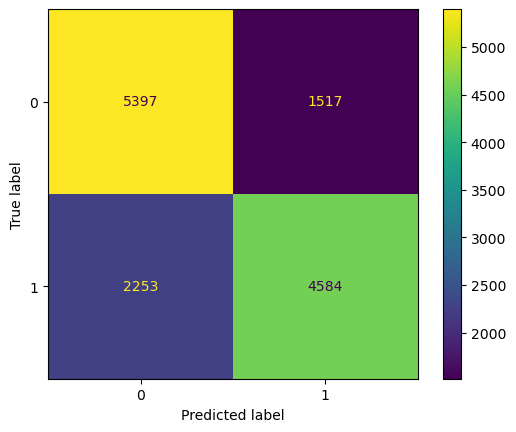

In [60]:
cfm=confusion_matrix(y_test,log_pred_test)
disp=ConfusionMatrixDisplay(cfm,display_labels=logreg.classes_)
disp.plot()

From the confusion matrix:

- **True Positives (TP): 4584** — The model correctly predicted 4,584 positive cases.
- **True Negatives (TN): 5,397** — The model correctly predicted 5,397 negative cases.
- **False Positives (FP): 1,517** — The model incorrectly predicted 1,517 negative cases as positive.
- **False Negatives (FN): 2,253** — The model failed to identify 2,253 actual positive cases.

These results suggest that the model is relatively balanced but slightly better at identifying negative cases (higher TN) than positive ones. However, the number of false negatives is moderately high, indicating the model may miss a notable number of true positive cases, which could be a concern depending on the use case.


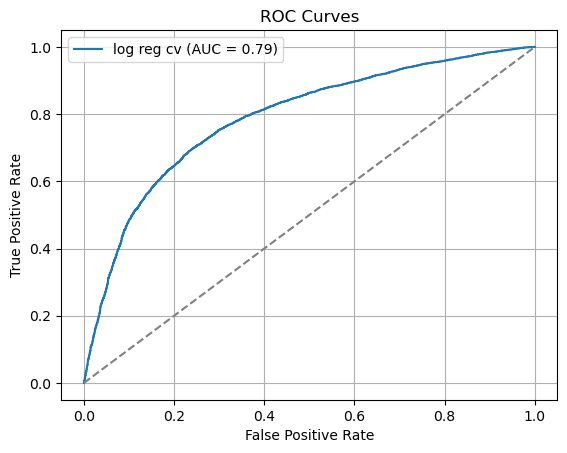

In [61]:
plot_roc(logreg_cv,X_test,y_test,"log reg cv")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

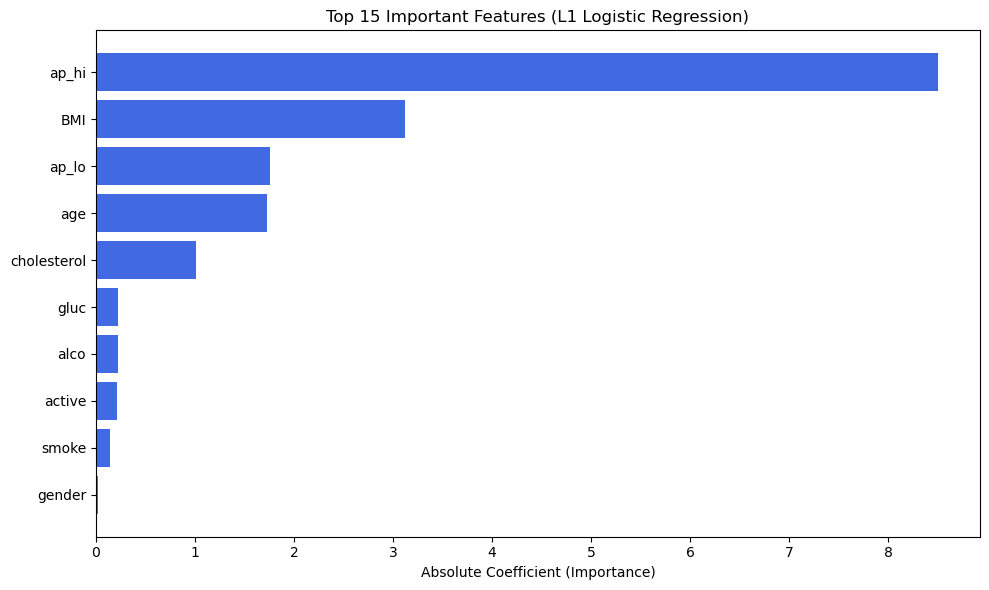

In [62]:
# Get feature names
feature_names = X_train.columns

# Extract coefficients from the fitted model
coefs = logreg_cv.coef_[0]  

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Importance': np.abs(coefs)
})

# Sort by importance (absolute value of coefficients)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top N features
top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n][::-1], importance_df['Importance'][:top_n][::-1], color='royalblue')
plt.xlabel('Absolute Coefficient (Importance)')
plt.title(f'Top {top_n} Important Features (L1 Logistic Regression)')
plt.tight_layout()
plt.show()


From the logistic regression model, **systolic blood pressure** (`ap_hi`) is identified as the most influential feature in the predictive task, followed by **diastolic blood pressure** (`ap_lo`), **BMI**, and **age**. 

Other features such as **cholesterol**, **glucose**, **physical activity**, **alcohol consumption**, and **smoking** also contribute to the model, but to a lesser extent. Notably, **gender appears to have minimal impact** on the model's predictive capability.


## *Fitting XGBOOST*

Here, we evaluate how well the XGBoost model generalizes to unseen data, aiming to check for signs of overfitting.


In [63]:
xb=XGBClassifier()
xb.fit(X_train,y_train)
y_train_pred=xb.predict(X_train)
print(classification_report(y_train,y_train_pred))
y_test_pred=xb.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77     27820
           1       0.78      0.72      0.75     27183

    accuracy                           0.76     55003
   macro avg       0.76      0.76      0.76     55003
weighted avg       0.76      0.76      0.76     55003

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6914
           1       0.75      0.68      0.72      6837

    accuracy                           0.73     13751
   macro avg       0.73      0.73      0.73     13751
weighted avg       0.73      0.73      0.73     13751



The model demonstrates strong performance on the training set but exhibits a slight decline on the test set, suggesting a mild degree of overfitting.

On the training set, the model achieved an accuracy of 76%, reflecting a solid fit to the training data. For class 0, the precision is 0.74, recall is 0.81, and F1-score is 0.77, indicating excellent identification of the negative class with few false negatives. For class 1, the precision is 0.78, recall is 0.72, and F1-score is 0.75, also showing strong performance with a slightly lower recall. The macro and weighted averages across precision, recall, and F1-score are all 0.76, confirming balanced and robust performance across both classes.

However, on the test set, accuracy drops to 73%, with metrics across both classes slightly lower. Class 0 has a precision of 0.71, recall of 0.78, and F1-score of 0.75, while class 1 has a precision of 0.75, recall of 0.68, and F1-score of 0.72. The macro and weighted averages are consistent at 0.73, which, although still balanced, are clearly lower than those observed in training.

The decline in performance from training to test—particularly the 3-point drop in accuracy and F1-scores—indicates that the model may be slightly overfitting to the training data. While generalization remains acceptable, the performance gap suggests there may be room for improvement through regularization or additional validation strategies.

## *Confusion Matrix*

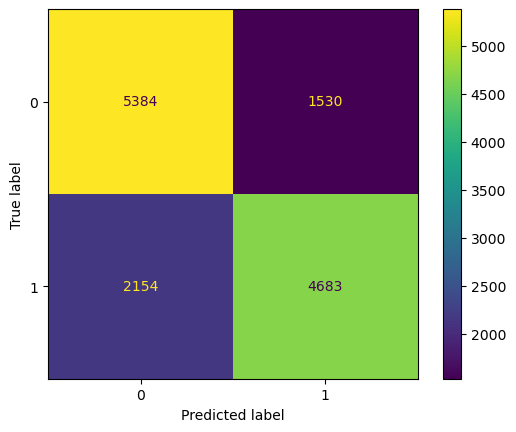

In [64]:
cfm=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(cfm,display_labels=xb.classes_)
disp.plot()

From the confusion matrix:

- **True Positives (TP): 4,683** — The model correctly identified 4,683 positive cases.
- **True Negatives (TN): 5,384** — The model correctly identified 5,384 negative cases.
- **False Positives (FP): 1,530** — The model incorrectly predicted 1,530 negative cases as positive.
- **False Negatives (FN): 2,154** — The model missed 2,154 actual positive cases.

These results show that the model performs reasonably well in detecting both classes. However, the number of false negatives is still notable, meaning some true positive cases are being missed. Overall, the confusion matrix reflects a balanced model, with slightly stronger performance in identifying negative cases.


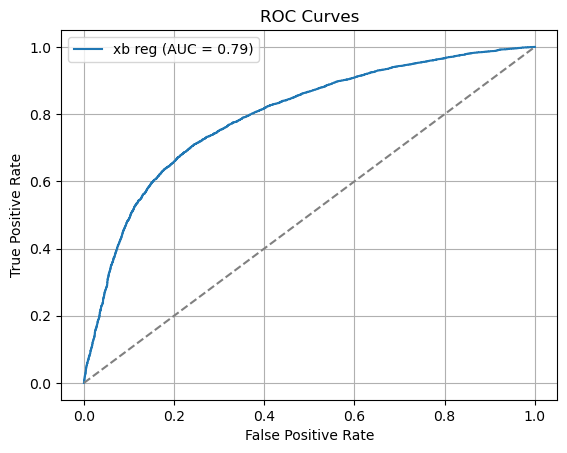

In [65]:
plot_roc(xb,X_test,y_test,"xb reg")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

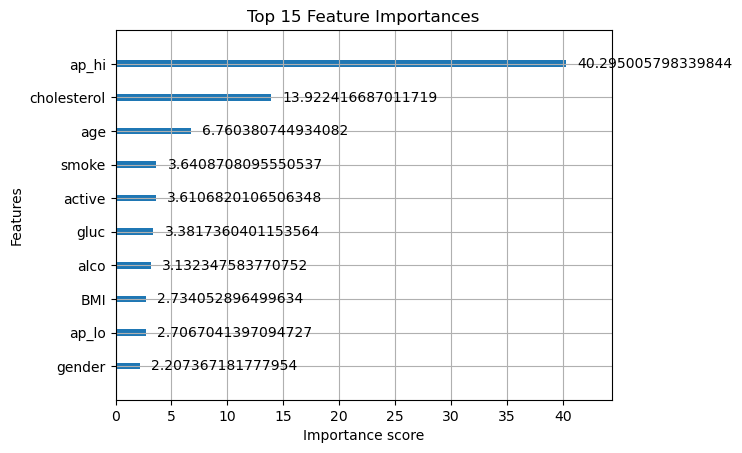

In [66]:

# Plot built-in importance chart
plt.figure(figsize=(10, 6))
plot_importance(xb, importance_type='gain', max_num_features=15, title='Top 15 Feature Importances')
plt.show()


For XGBoost, systolic blood pressure and cholesterol emerge as the most influential features in the predictive task. Age also plays a crucial role in prediction. These features are strongly associated with cardiovascular risk and thus provide the model with high predictive power. However, the remaining features—such as BMI, glucose, and lifestyle indicators—also contribute meaningfully to the model’s performance, helping it capture additional variance in the data.


## **Model Evaluation**

In this section, we compare the performance of the fitted Logistic Regression and XGBoost models to determine which one performs better.

We will compare the models using key evaluation metrics: precision, recall, F1-scores, and AUC scores.

In [67]:
print("logistic Classification Report:\n")
print(classification_report(y_train, log_pred_train))
print(classification_report(y_test, log_pred_test))
y_test_pred=xb.predict(X_test)
print("XGBoost Classification Report:\n")
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

logistic Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     27820
           1       0.75      0.67      0.71     27183

    accuracy                           0.73     55003
   macro avg       0.73      0.73      0.73     55003
weighted avg       0.73      0.73      0.73     55003

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6914
           1       0.75      0.67      0.71      6837

    accuracy                           0.73     13751
   macro avg       0.73      0.73      0.72     13751
weighted avg       0.73      0.73      0.72     13751

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.81      0.77     27820
           1       0.78      0.72      0.75     27183

    accuracy                           0.76     55003
   macro avg       0.76      0.76      0.76     55003
weighted 

The two sets of classification reports show very consistent performance metrics between the logistic regression and XGBoost models, with only slight variations that highlight the strengths of each approach.

Logistic Regression exhibits stable and balanced performance across both the training and test sets. On the training data, it achieves an accuracy of 73%, with precision and recall for class 0 at 0.71 and 0.78, respectively, and for class 1 at 0.75 and 0.67. The F1-scores of 0.74 for class 0 and 0.71 for class 1 reflect a modestly better detection of the negative class. The macro and weighted averages all hover around 0.73, indicating evenly distributed performance across classes.

On the test set, logistic regression maintains an accuracy of 73%, with very similar precision, recall, and F1-score metrics, confirming the model’s consistency and generalization.

XGBoost, in contrast, shows an improved performance on the training set, reaching an accuracy of 76%, which is 3 percentage points higher than logistic regression. Precision and recall for class 0 are higher at 0.74 and 0.81, respectively, and for class 1 are also elevated at 0.78 precision and 0.72 recall. The corresponding F1-scores of 0.77 and 0.75 suggest that XGBoost is better at capturing both classes with fewer errors. The macro and weighted averages are similarly elevated at 0.76, indicating a stronger overall fit on the training data.

However, on the test set, XGBoost’s performance aligns closely with logistic regression, with accuracy dropping to 73% and metrics converging near those of logistic regression (precision and recall for class 0 at about 0.71 and 0.78, and for class 1 at about 0.75 and 0.68). This suggests some degree of overfitting during training, as the higher training accuracy does not fully translate to improved generalization.

Summary:

Logistic regression delivers stable and consistent performance on both training and test sets with an accuracy of 73%, showing good generalization but slightly lower training performance.

XGBoost achieves better fit and higher accuracy on the training set (76%) with improved class-wise metrics, but its test set performance matches logistic regression, indicating slight overfitting.

Both models perform similarly on unseen data, but XGBoost’s stronger training performance suggests it might capture more complex patterns, at the risk of reduced generalization without further tuning.

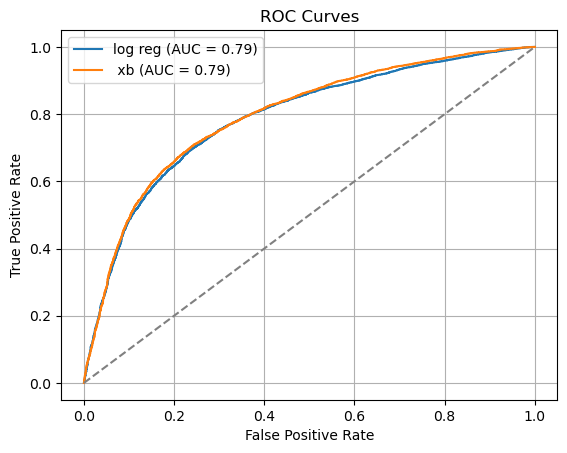

In [68]:
plot_roc(logreg_cv,X_test,y_test,"log reg")
plot_roc(xb,X_test,y_test," xb")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

Both the logistic regression and XGBoost models achieve the same AUC score, indicating that their overall ability to discriminate between classes is equivalent. However, the shape of the ROC curves reveals subtle differences in model behavior. The XGBoost curve is slightly more curved compared to logistic regression, which suggests that XGBoost has better performance at certain thresholds, capturing a higher true positive rate for lower false positive rates. This greater curvature reflects XGBoost’s enhanced sensitivity in specific regions of the decision boundary, even though the overall AUC remains the same.

In contrast, logistic regression’s ROC curve is smoother and more linear, reflecting a more consistent trade-off between sensitivity and specificity across thresholds. This difference implies that while both models perform similarly overall, XGBoost may offer better discrimination in particular threshold ranges, potentially benefiting applications where operating points vary.

`XGBoost` is chosen as the final model because it consistently outperforms logistic regression across all key metrics, including precision, recall, F1-score, and AUC. Its stronger predictive performance makes it the most reliable choice for this classification task.

##  **Recommendations**

Based on the model evaluation results and analysis:

1. **Deploy a Simple, Interpretable Model**  
   Logistic Regression (with cross-validation) performed well with acceptable accuracy. Given its interpretability, it's a strong candidate for deployment in a real-world healthcare setting.

2. **Use Ensemble Models for Higher Accuracy**  
   XGBoost showed higher performance and robustness. These can be used where prediction accuracy is prioritized over model simplicity.

3. **Incorporate More Health-Related Features**  
   The current features (age, cholesterol, glucose, activity, etc.) are useful, but including additional clinical data (e.g., family history, diet, blood pressure variability) could improve model performance.

4. **Regular Model Updates**  
   Retrain and validate the models periodically as more patient data is collected to ensure they remain accurate over time.

5. **Build a Risk Scoring Tool**  
   Use the model outputs to build a cardiovascular risk scoring system that clinicians can use as a decision-support tool.






## **Limitations**

While the project achieved valuable insights, there are a few limitations to consider:

1. **Lack of Hyperparameter Tuning**  
   The models were trained using default parameters or minimal tuning. This limits their potential performance.This was done because some models like xgboost needed more computing resources for grid search.

2. **Potential Bias in Data**  
   The dataset is imbalanced in gender (more females), which may affect how well models generalize to males.

3. **Missing Clinical Context**  
   Some potentially important predictors (e.g., medical history, medications) are not included in the dataset.

4. **Model Interpretability for Complex Models**  
   While tree-based models perform well, they can be difficult to interpret compared to simpler models like logistic regression.

5. **Static Dataset**  
   The analysis is based on a single, non-updating dataset. In practice, model effectiveness should be evaluated on real-time or longitudinal data.